# **Content**
1. [Hazırlayanlar](#1)
1. [Veri Setinin Yüklenmesi](#2)
    * [Verinin İncelenmesi](#3)
    * [Verinin Görselleştirilmesi](#4)
1. [Öncül Olasılıkların Hesabı](#5)
1. [Toy Bayés Yöntemi Kullanımı Ve Açıklaması](#6)
1. [Test Verisi Üzerinden Tahminde Bulunma](#7)
1. [Karmaşıklık Matrisi](#8)

<a id=1></a>
## Hazırlayanlar 

* #### Grup Numarası: 3
* #### Anıl Dursun İpek - 031890131
* #### Batuhan Arslandaş - 032190097

<a id=2></a>
## Veri Setinin Yüklenmesi

In [1]:
# Gerekli Kütüphaneler
import numpy as np # lineer cebir kütüphanesi
import matplotlib.pyplot as plt # görselleştirme kütüphanesi
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set_style('white')

In [2]:
letters = pd.read_csv('letter_recognition.data')

<a id=3></a>
### Verinin İncelenmesi

1. Data içerisinde null değer bulunmamaktadır.
1. Toplam veri sayısı: 20000
1. Toplam feature sayısı: 17
1. Veri Türleri:
    * Letter: object
    * F1 - F16: int64

In [3]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Letter  20000 non-null  object
 1   F1      20000 non-null  int64 
 2   F2      20000 non-null  int64 
 3   F3      20000 non-null  int64 
 4   F4      20000 non-null  int64 
 5   F5      20000 non-null  int64 
 6   F6      20000 non-null  int64 
 7   F7      20000 non-null  int64 
 8   F8      20000 non-null  int64 
 9   F9      20000 non-null  int64 
 10  F10     20000 non-null  int64 
 11  F11     20000 non-null  int64 
 12  F12     20000 non-null  int64 
 13  F13     20000 non-null  int64 
 14  F14     20000 non-null  int64 
 15  F15     20000 non-null  int64 
 16  F16     20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
letters.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
# Veri eğitim ve test olarak ayrıldı
train = letters[:16000]
test = letters[16000:]
print("Train length -> ", len(train), " Test length -> ", len(test))

Train length ->  16000  Test length ->  4000


In [6]:
train.head()

,Letter,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
test.head()

,Letter,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
16000,U,4,10,6,7,9,9,6,4,3,6,7,7,9,8,5,6
16001,N,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
16002,V,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
16003,I,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
16004,N,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7


In [8]:
data = train.values
data

array([['T', 2, 8, ..., 8, 0, 8],
       ['I', 5, 12, ..., 8, 4, 10],
       ['D', 4, 11, ..., 7, 3, 9],
       ...,
       ['G', 8, 14, ..., 7, 5, 8],
       ['E', 4, 7, ..., 8, 5, 8],
       ['C', 2, 1, ..., 9, 4, 10]], dtype=object)

In [9]:
# Veri seti içerisindeki harfler diziye aktarıldı
letter_unique = np.unique(train["Letter"])
letter_unique

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

<a id=4></a>
### Verinin Görselleştirilmesi

In [10]:
# Eğitim veri seti içerisindeki her bir harf gruplandırıldı ve toplam sayıları diziye aktarıldı
letter_num =  train.groupby('Letter')['Letter'].count()
print(letter_num)
letter_counts =  letter_num.values
letter_sum = sum(letter_counts)
print("Toplam Harf Sayısı(Train datası içerisindeki veri sayısı): ",letter_sum)

Letter
A    633
B    630
C    594
D    638
E    616
F    622
G    609
H    583
I    590
J    599
K    593
L    604
M    648
N    617
O    614
P    635
Q    615
R    597
S    587
T    645
U    645
V    628
W    613
X    628
Y    641
Z    576
Name: Letter, dtype: int64
Toplam Harf Sayısı(Train datası içerisindeki veri sayısı):  16000


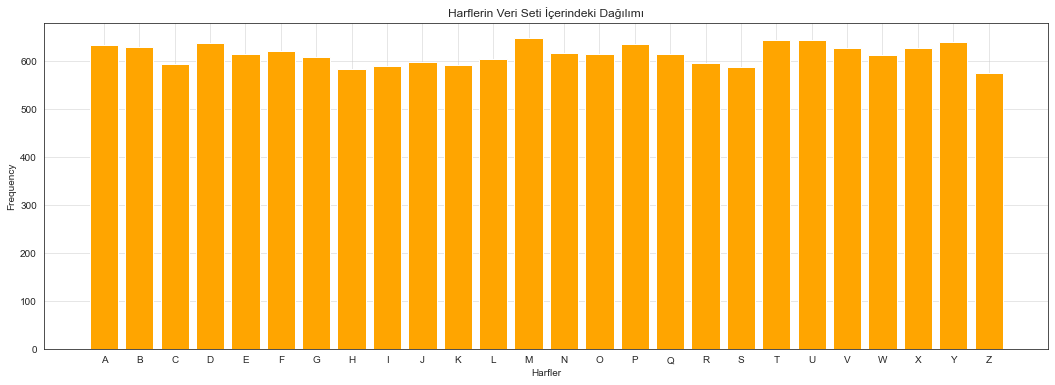

In [11]:
plt.figure(figsize=(18,6))
plt.bar(letter_num.index,letter_num.values,color="orange")
plt.xlabel("Harfler")
plt.ylabel("Frequency")
plt.title("Harflerin Veri Seti İçerindeki Dağılımı")
plt.grid(True,alpha=0.6)
plt.show()

<a id=5></a>
## Öncül Olasılıkların Hesabı

In [12]:
prior_prob = letter_counts/letter_sum
print("Öncül Olasılıklar \n",prior_prob)

Öncül Olasılıklar 
 [0.0395625 0.039375  0.037125  0.039875  0.0385    0.038875  0.0380625
 0.0364375 0.036875  0.0374375 0.0370625 0.03775   0.0405    0.0385625
 0.038375  0.0396875 0.0384375 0.0373125 0.0366875 0.0403125 0.0403125
 0.03925   0.0383125 0.03925   0.0400625 0.036    ]


<a id=6></a>
## Toy Bayés Yöntemi Kullanımı Ve Açıklaması

In [13]:
# Feature'lar algoritma için değişkene aktarıldı
features = train.columns
num_features = features.shape[0]
print(features)

Index(['Letter', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16'],
      dtype='object')


In [14]:
# Data set içerisindeki hesaplanan koşullu olasılıkların aktarılması için dataframe oluşturuldu
df = pd.DataFrame(columns=["Letter","Feature","Value","Prob"])

for i in range(1,num_features): # Her bir feature'u hesaplaması için oluşturulan döngü
    fi =  train.groupby(['Letter', features[i]])[features[i]].count() # Veri seti her bir harf ve feature için gruplandırıldı
    print(f"FEATURE {features[i]}")
    for x in letter_unique: # Her bir harfi hesaplaması için oluşturulan döngü
        values = np.sort(train[train.Letter == x][features[i]].unique()) # Harf içerisindeki her bir feature'ın değer aralığı filterelendi
        print("Harfin feature içerisindeki değer aralığı \n",values)
        for y in range(16): # Her bir harfin feature içerisindeki her bir değer aralığını hesaplaması için oluşturulan döngü
            print(f"Harf: {x} Deger {y}")
            if(np.isin(values,y).sum()): 
                # Eğer değer aralığı içinde var ise toplam kaç adet olduğuna göre hesaplama yaptırıldı
                # Örneğin A için F1=15 yok. Bu nedenle harfte F1 için 15'in oluşma sayııs 0'dır.
                # Harf içerisinde oluşma sayısı 0 dan farklı olan feature'lar için oluşma sayısı hesaplanarak koşullu olasılık hesabı yapıldı.
                result = (fi[fi.index == (x,y)].values[0] + 1) / (letter_num[x] + 16)
            else:
                result =  (0 + 1) / (letter_num[x] + 16)
            print("Sonuç -> ", result)
            df.loc[len(df.index)] = [x,features[i],y,result]
        print("----------------------------")

FEATURE F1
Harfin feature içerisindeki değer aralığı 
 [1 2 3 4 5 6 7 8 9]
Harf: A Deger 0
Sonuç ->  0.0015408320493066256
Harf: A Deger 1
Sonuç ->  0.07087827426810478
Harf: A Deger 2
Sonuç ->  0.2357473035439137
Harf: A Deger 3
Sonuç ->  0.325115562403698
Harf: A Deger 4
Sonuç ->  0.17257318952234207
Harf: A Deger 5
Sonuç ->  0.0847457627118644
Harf: A Deger 6
Sonuç ->  0.05238828967642527
Harf: A Deger 7
Sonuç ->  0.02773497688751926
Harf: A Deger 8
Sonuç ->  0.012326656394453005
Harf: A Deger 9
Sonuç ->  0.007704160246533128
Harf: A Deger 10
Sonuç ->  0.0015408320493066256
Harf: A Deger 11
Sonuç ->  0.0015408320493066256
Harf: A Deger 12
Sonuç ->  0.0015408320493066256
Harf: A Deger 13
Sonuç ->  0.0015408320493066256
Harf: A Deger 14
Sonuç ->  0.0015408320493066256
Harf: A Deger 15
Sonuç ->  0.0015408320493066256
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Harf: B Deger 0
Sonuç ->  0.0030959752321981426
Harf: B Dege

----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 10 11]
Harf: N Deger 0
Sonuç ->  0.001579778830963665
Harf: N Deger 1
Sonuç ->  0.044233807266982623
Harf: N Deger 2
Sonuç ->  0.10742496050552923
Harf: N Deger 3
Sonuç ->  0.1769352290679305
Harf: N Deger 4
Sonuç ->  0.21011058451816747
Harf: N Deger 5
Sonuç ->  0.1943127962085308
Harf: N Deger 6
Sonuç ->  0.12164296998420221
Harf: N Deger 7
Sonuç ->  0.052132701421800945
Harf: N Deger 8
Sonuç ->  0.03475513428120063
Harf: N Deger 9
Sonuç ->  0.01579778830963665
Harf: N Deger 10
Sonuç ->  0.023696682464454975
Harf: N Deger 11
Sonuç ->  0.011058451816745656
Harf: N Deger 12
Sonuç ->  0.001579778830963665
Harf: N Deger 13
Sonuç ->  0.001579778830963665
Harf: N Deger 14
Sonuç ->  0.001579778830963665
Harf: N Deger 15
Sonuç ->  0.001579778830963665
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 10]
Harf: O Deger 0
Sonuç ->  0.0015873015

Harf: X Deger 11
Sonuç ->  0.006211180124223602
Harf: X Deger 12
Sonuç ->  0.0015527950310559005
Harf: X Deger 13
Sonuç ->  0.0015527950310559005
Harf: X Deger 14
Sonuç ->  0.0015527950310559005
Harf: X Deger 15
Sonuç ->  0.0015527950310559005
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10]
Harf: Y Deger 0
Sonuç ->  0.0030441400304414
Harf: Y Deger 1
Sonuç ->  0.060882800608828
Harf: Y Deger 2
Sonuç ->  0.1552511415525114
Harf: Y Deger 3
Sonuç ->  0.2237442922374429
Harf: Y Deger 4
Sonuç ->  0.1659056316590563
Harf: Y Deger 5
Sonuç ->  0.136986301369863
Harf: Y Deger 6
Sonuç ->  0.0943683409436834
Harf: Y Deger 7
Sonuç ->  0.076103500761035
Harf: Y Deger 8
Sonuç ->  0.0410958904109589
Harf: Y Deger 9
Sonuç ->  0.0258751902587519
Harf: Y Deger 10
Sonuç ->  0.0091324200913242
Harf: Y Deger 11
Sonuç ->  0.0015220700152207
Harf: Y Deger 12
Sonuç ->  0.0015220700152207
Harf: Y Deger 13
Sonuç ->  0.0015220700152207
Harf: Y Deger 14


Harf: J Deger 13
Sonuç ->  0.008130081300813009
Harf: J Deger 14
Sonuç ->  0.0016260162601626016
Harf: J Deger 15
Sonuç ->  0.0016260162601626016
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Harf: K Deger 0
Sonuç ->  0.027914614121510674
Harf: K Deger 1
Sonuç ->  0.04597701149425287
Harf: K Deger 2
Sonuç ->  0.026272577996715927
Harf: K Deger 3
Sonuç ->  0.06403940886699508
Harf: K Deger 4
Sonuç ->  0.06732348111658457
Harf: K Deger 5
Sonuç ->  0.07881773399014778
Harf: K Deger 6
Sonuç ->  0.06732348111658457
Harf: K Deger 7
Sonuç ->  0.11494252873563218
Harf: K Deger 8
Sonuç ->  0.08374384236453201
Harf: K Deger 9
Sonuç ->  0.1625615763546798
Harf: K Deger 10
Sonuç ->  0.1116584564860427
Harf: K Deger 11
Sonuç ->  0.0722495894909688
Harf: K Deger 12
Sonuç ->  0.019704433497536946
Harf: K Deger 13
Sonuç ->  0.022988505747126436
Harf: K Deger 14
Sonuç ->  0.014778325123152709
Harf: K Deger 15
Sonuç ->  0.01970

Harf: U Deger 11
Sonuç ->  0.07413010590015129
Harf: U Deger 12
Sonuç ->  0.01361573373676248
Harf: U Deger 13
Sonuç ->  0.012102874432677761
Harf: U Deger 14
Sonuç ->  0.01059001512859304
Harf: U Deger 15
Sonuç ->  0.01664145234493192
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Harf: V Deger 0
Sonuç ->  0.04192546583850932
Harf: V Deger 1
Sonuç ->  0.03571428571428571
Harf: V Deger 2
Sonuç ->  0.026397515527950312
Harf: V Deger 3
Sonuç ->  0.055900621118012424
Harf: V Deger 4
Sonuç ->  0.05434782608695652
Harf: V Deger 5
Sonuç ->  0.062111801242236024
Harf: V Deger 6
Sonuç ->  0.09782608695652174
Harf: V Deger 7
Sonuç ->  0.11180124223602485
Harf: V Deger 8
Sonuç ->  0.10403726708074534
Harf: V Deger 9
Sonuç ->  0.13664596273291926
Harf: V Deger 10
Sonuç ->  0.12422360248447205
Harf: V Deger 11
Sonuç ->  0.08850931677018634
Harf: V Deger 12
Sonuç ->  0.015527950310559006
Harf: V Deger 13
Sonuç ->  0.0186335

Harf: E Deger 15
Sonuç ->  0.0015822784810126582
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 10]
Harf: F Deger 0
Sonuç ->  0.001567398119122257
Harf: F Deger 1
Sonuç ->  0.029780564263322883
Harf: F Deger 2
Sonuç ->  0.054858934169279
Harf: F Deger 3
Sonuç ->  0.1536050156739812
Harf: F Deger 4
Sonuç ->  0.1896551724137931
Harf: F Deger 5
Sonuç ->  0.18025078369905956
Harf: F Deger 6
Sonuç ->  0.1896551724137931
Harf: F Deger 7
Sonuç ->  0.10658307210031348
Harf: F Deger 8
Sonuç ->  0.05799373040752351
Harf: F Deger 9
Sonuç ->  0.0219435736677116
Harf: F Deger 10
Sonuç ->  0.006269592476489028
Harf: F Deger 11
Sonuç ->  0.001567398119122257
Harf: F Deger 12
Sonuç ->  0.001567398119122257
Harf: F Deger 13
Sonuç ->  0.001567398119122257
Harf: F Deger 14
Sonuç ->  0.001567398119122257
Harf: F Deger 15
Sonuç ->  0.001567398119122257
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 1

Harf: P Deger 8
Sonuç ->  0.07987711213517665
Harf: P Deger 9
Sonuç ->  0.04608294930875576
Harf: P Deger 10
Sonuç ->  0.016897081413210446
Harf: P Deger 11
Sonuç ->  0.0015360983102918587
Harf: P Deger 12
Sonuç ->  0.0015360983102918587
Harf: P Deger 13
Sonuç ->  0.0015360983102918587
Harf: P Deger 14
Sonuç ->  0.0015360983102918587
Harf: P Deger 15
Sonuç ->  0.0015360983102918587
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 10 11]
Harf: Q Deger 0
Sonuç ->  0.001584786053882726
Harf: Q Deger 1
Sonuç ->  0.00792393026941363
Harf: Q Deger 2
Sonuç ->  0.08399366085578447
Harf: Q Deger 3
Sonuç ->  0.12995245641838352
Harf: Q Deger 4
Sonuç ->  0.18700475435816163
Harf: Q Deger 5
Sonuç ->  0.2202852614896989
Harf: Q Deger 6
Sonuç ->  0.19334389857369255
Harf: Q Deger 7
Sonuç ->  0.0919175911251981
Harf: Q Deger 8
Sonuç ->  0.0554675118858954
Harf: Q Deger 9
Sonuç ->  0.009508716323296355
Harf: Q Deger 10
Sonuç ->  0.00792393026941363
H

Harf: A Deger 7
Sonuç ->  0.1263482280431433
Harf: A Deger 8
Sonuç ->  0.1617873651771957
Harf: A Deger 9
Sonuç ->  0.012326656394453005
Harf: A Deger 10
Sonuç ->  0.0015408320493066256
Harf: A Deger 11
Sonuç ->  0.0015408320493066256
Harf: A Deger 12
Sonuç ->  0.0015408320493066256
Harf: A Deger 13
Sonuç ->  0.0015408320493066256
Harf: A Deger 14
Sonuç ->  0.0015408320493066256
Harf: A Deger 15
Sonuç ->  0.0015408320493066256
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7 8 9]
Harf: B Deger 0
Sonuç ->  0.017027863777089782
Harf: B Deger 1
Sonuç ->  0.05108359133126935
Harf: B Deger 2
Sonuç ->  0.07585139318885449
Harf: B Deger 3
Sonuç ->  0.07894736842105263
Harf: B Deger 4
Sonuç ->  0.15479876160990713
Harf: B Deger 5
Sonuç ->  0.11455108359133127
Harf: B Deger 6
Sonuç ->  0.18421052631578946
Harf: B Deger 7
Sonuç ->  0.11609907120743033
Harf: B Deger 8
Sonuç ->  0.19195046439628483
Harf: B Deger 9
Sonuç ->  0.006191950464396285
Harf: B Dege

Harf: M Deger 6
Sonuç ->  0.16415662650602408
Harf: M Deger 7
Sonuç ->  0.11144578313253012
Harf: M Deger 8
Sonuç ->  0.20933734939759036
Harf: M Deger 9
Sonuç ->  0.010542168674698794
Harf: M Deger 10
Sonuç ->  0.0015060240963855422
Harf: M Deger 11
Sonuç ->  0.0015060240963855422
Harf: M Deger 12
Sonuç ->  0.0015060240963855422
Harf: M Deger 13
Sonuç ->  0.0015060240963855422
Harf: M Deger 14
Sonuç ->  0.0015060240963855422
Harf: M Deger 15
Sonuç ->  0.0015060240963855422
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7 8 9]
Harf: N Deger 0
Sonuç ->  0.007898894154818325
Harf: N Deger 1
Sonuç ->  0.05529225908372828
Harf: N Deger 2
Sonuç ->  0.05529225908372828
Harf: N Deger 3
Sonuç ->  0.09162717219589257
Harf: N Deger 4
Sonuç ->  0.12322274881516587
Harf: N Deger 5
Sonuç ->  0.14691943127962084
Harf: N Deger 6
Sonuç ->  0.18799368088467613
Harf: N Deger 7
Sonuç ->  0.14375987361769352
Harf: N Deger 8
Sonuç ->  0.16587677725118483
Harf: N Deg

Harf: X Deger 2
Sonuç ->  0.05434782608695652
Harf: X Deger 3
Sonuç ->  0.09627329192546584
Harf: X Deger 4
Sonuç ->  0.14751552795031056
Harf: X Deger 5
Sonuç ->  0.12732919254658384
Harf: X Deger 6
Sonuç ->  0.19254658385093168
Harf: X Deger 7
Sonuç ->  0.13509316770186336
Harf: X Deger 8
Sonuç ->  0.15372670807453417
Harf: X Deger 9
Sonuç ->  0.015527950310559006
Harf: X Deger 10
Sonuç ->  0.0015527950310559005
Harf: X Deger 11
Sonuç ->  0.0015527950310559005
Harf: X Deger 12
Sonuç ->  0.0015527950310559005
Harf: X Deger 13
Sonuç ->  0.0015527950310559005
Harf: X Deger 14
Sonuç ->  0.0015527950310559005
Harf: X Deger 15
Sonuç ->  0.0015527950310559005
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Harf: Y Deger 0
Sonuç ->  0.0243531202435312
Harf: Y Deger 1
Sonuç ->  0.0547945205479452
Harf: Y Deger 2
Sonuç ->  0.0532724505327245
Harf: Y Deger 3
Sonuç ->  0.0547945205479452
Harf: Y Deger 4
Sonuç ->  0.153729

Harf: I Deger 4
Sonuç ->  0.07920792079207921
Harf: I Deger 5
Sonuç ->  0.039603960396039604
Harf: I Deger 6
Sonuç ->  0.02145214521452145
Harf: I Deger 7
Sonuç ->  0.013201320132013201
Harf: I Deger 8
Sonuç ->  0.009900990099009901
Harf: I Deger 9
Sonuç ->  0.0016501650165016502
Harf: I Deger 10
Sonuç ->  0.0016501650165016502
Harf: I Deger 11
Sonuç ->  0.0016501650165016502
Harf: I Deger 12
Sonuç ->  0.0016501650165016502
Harf: I Deger 13
Sonuç ->  0.0016501650165016502
Harf: I Deger 14
Sonuç ->  0.0016501650165016502
Harf: I Deger 15
Sonuç ->  0.0016501650165016502
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7 8]
Harf: J Deger 0
Sonuç ->  0.06504065040650407
Harf: J Deger 1
Sonuç ->  0.34308943089430893
Harf: J Deger 2
Sonuç ->  0.1951219512195122
Harf: J Deger 3
Sonuç ->  0.16422764227642275
Harf: J Deger 4
Sonuç ->  0.1040650406504065
Harf: J Deger 5
Sonuç ->  0.06829268292682927
Harf: J Deger 6
Sonuç ->  0.026016260162601626
Harf: J Deg

Harf: T Deger 1
Sonuç ->  0.23600605143721634
Harf: T Deger 2
Sonuç ->  0.22087745839636913
Harf: T Deger 3
Sonuç ->  0.16792738275340394
Harf: T Deger 4
Sonuç ->  0.11951588502269289
Harf: T Deger 5
Sonuç ->  0.08472012102874432
Harf: T Deger 6
Sonuç ->  0.05597579425113464
Harf: T Deger 7
Sonuç ->  0.03177004538577912
Harf: T Deger 8
Sonuç ->  0.015128593040847202
Harf: T Deger 9
Sonuç ->  0.007564296520423601
Harf: T Deger 10
Sonuç ->  0.0015128593040847202
Harf: T Deger 11
Sonuç ->  0.0015128593040847202
Harf: T Deger 12
Sonuç ->  0.0015128593040847202
Harf: T Deger 13
Sonuç ->  0.0015128593040847202
Harf: T Deger 14
Sonuç ->  0.0015128593040847202
Harf: T Deger 15
Sonuç ->  0.0015128593040847202
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Harf: U Deger 0
Sonuç ->  0.036308623298033284
Harf: U Deger 1
Sonuç ->  0.12708018154311648
Harf: U Deger 2
Sonuç ->  0.26021180030257185
Harf: U Deger 3
Sonuç ->  0.167927382

Sonuç ->  0.20948012232415902
Harf: D Deger 10
Sonuç ->  0.08409785932721713
Harf: D Deger 11
Sonuç ->  0.021406727828746176
Harf: D Deger 12
Sonuç ->  0.00764525993883792
Harf: D Deger 13
Sonuç ->  0.0030581039755351682
Harf: D Deger 14
Sonuç ->  0.0015290519877675841
Harf: D Deger 15
Sonuç ->  0.0015290519877675841
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10]
Harf: E Deger 0
Sonuç ->  0.0015822784810126582
Harf: E Deger 1
Sonuç ->  0.0015822784810126582
Harf: E Deger 2
Sonuç ->  0.00949367088607595
Harf: E Deger 3
Sonuç ->  0.19145569620253164
Harf: E Deger 4
Sonuç ->  0.04588607594936709
Harf: E Deger 5
Sonuç ->  0.08386075949367089
Harf: E Deger 6
Sonuç ->  0.15664556962025317
Harf: E Deger 7
Sonuç ->  0.3322784810126582
Harf: E Deger 8
Sonuç ->  0.10126582278481013
Harf: E Deger 9
Sonuç ->  0.03481012658227848
Harf: E Deger 10
Sonuç ->  0.03322784810126582
Harf: E Deger 11
Sonuç ->  0.0015822784810126582
Harf: E Deger 12
Son

Harf: N Deger 13
Sonuç ->  0.001579778830963665
Harf: N Deger 14
Sonuç ->  0.001579778830963665
Harf: N Deger 15
Sonuç ->  0.001579778830963665
----------------------------
Harfin feature içerisindeki değer aralığı 
 [4 5 6 7 8 9]
Harf: O Deger 0
Sonuç ->  0.0015873015873015873
Harf: O Deger 1
Sonuç ->  0.0015873015873015873
Harf: O Deger 2
Sonuç ->  0.0015873015873015873
Harf: O Deger 3
Sonuç ->  0.0015873015873015873
Harf: O Deger 4
Sonuç ->  0.006349206349206349
Harf: O Deger 5
Sonuç ->  0.022222222222222223
Harf: O Deger 6
Sonuç ->  0.06190476190476191
Harf: O Deger 7
Sonuç ->  0.4634920634920635
Harf: O Deger 8
Sonuç ->  0.4015873015873016
Harf: O Deger 9
Sonuç ->  0.02857142857142857
Harf: O Deger 10
Sonuç ->  0.0015873015873015873
Harf: O Deger 11
Sonuç ->  0.0015873015873015873
Harf: O Deger 12
Sonuç ->  0.0015873015873015873
Harf: O Deger 13
Sonuç ->  0.0015873015873015873
Harf: O Deger 14
Sonuç ->  0.0015873015873015873
Harf: O Deger 15
Sonuç ->  0.0015873015873015873
-------

Harf: X Deger 9
Sonuç ->  0.07608695652173914
Harf: X Deger 10
Sonuç ->  0.03571428571428571
Harf: X Deger 11
Sonuç ->  0.013975155279503106
Harf: X Deger 12
Sonuç ->  0.003105590062111801
Harf: X Deger 13
Sonuç ->  0.0015527950310559005
Harf: X Deger 14
Sonuç ->  0.0015527950310559005
Harf: X Deger 15
Sonuç ->  0.0015527950310559005
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10]
Harf: Y Deger 0
Sonuç ->  0.0015220700152207
Harf: Y Deger 1
Sonuç ->  0.0015220700152207
Harf: Y Deger 2
Sonuç ->  0.0213089802130898
Harf: Y Deger 3
Sonuç ->  0.0837138508371385
Harf: Y Deger 4
Sonuç ->  0.1324200913242009
Harf: Y Deger 5
Sonuç ->  0.091324200913242
Harf: Y Deger 6
Sonuç ->  0.1050228310502283
Harf: Y Deger 7
Sonuç ->  0.2252663622526636
Harf: Y Deger 8
Sonuç ->  0.1476407914764079
Harf: Y Deger 9
Sonuç ->  0.1354642313546423
Harf: Y Deger 10
Sonuç ->  0.0471841704718417
Harf: Y Deger 11
Sonuç ->  0.0015220700152207
Harf: Y Deger 12
Sonu

Harf: H Deger 15
Sonuç ->  0.001669449081803005
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 3  4  5  6  7  8  9 10]
Harf: I Deger 0
Sonuç ->  0.0016501650165016502
Harf: I Deger 1
Sonuç ->  0.0016501650165016502
Harf: I Deger 2
Sonuç ->  0.0016501650165016502
Harf: I Deger 3
Sonuç ->  0.0033003300330033004
Harf: I Deger 4
Sonuç ->  0.01485148514851485
Harf: I Deger 5
Sonuç ->  0.039603960396039604
Harf: I Deger 6
Sonuç ->  0.09570957095709572
Harf: I Deger 7
Sonuç ->  0.6402640264026402
Harf: I Deger 8
Sonuç ->  0.132013201320132
Harf: I Deger 9
Sonuç ->  0.052805280528052806
Harf: I Deger 10
Sonuç ->  0.00825082508250825
Harf: I Deger 11
Sonuç ->  0.0016501650165016502
Harf: I Deger 12
Sonuç ->  0.0016501650165016502
Harf: I Deger 13
Sonuç ->  0.0016501650165016502
Harf: I Deger 14
Sonuç ->  0.0016501650165016502
Harf: I Deger 15
Sonuç ->  0.0016501650165016502
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7

Harf: S Deger 10
Sonuç ->  0.013266998341625208
Harf: S Deger 11
Sonuç ->  0.001658374792703151
Harf: S Deger 12
Sonuç ->  0.001658374792703151
Harf: S Deger 13
Sonuç ->  0.001658374792703151
Harf: S Deger 14
Sonuç ->  0.001658374792703151
Harf: S Deger 15
Sonuç ->  0.001658374792703151
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 6  7  8  9 10 11 12 13 14 15]
Harf: T Deger 0
Sonuç ->  0.0015128593040847202
Harf: T Deger 1
Sonuç ->  0.0015128593040847202
Harf: T Deger 2
Sonuç ->  0.0015128593040847202
Harf: T Deger 3
Sonuç ->  0.0015128593040847202
Harf: T Deger 4
Sonuç ->  0.0015128593040847202
Harf: T Deger 5
Sonuç ->  0.0015128593040847202
Harf: T Deger 6
Sonuç ->  0.006051437216338881
Harf: T Deger 7
Sonuç ->  0.06202723146747353
Harf: T Deger 8
Sonuç ->  0.08774583963691376
Harf: T Deger 9
Sonuç ->  0.04387291981845688
Harf: T Deger 10
Sonuç ->  0.06505295007564296
Harf: T Deger 11
Sonuç ->  0.23751891074130105
Harf: T Deger 12
Sonuç ->  0.20121028744

Harf: D Deger 15
Sonuç ->  0.0015290519877675841
----------------------------
Harfin feature içerisindeki değer aralığı 
 [1 2 3 4 5 6 7 8]
Harf: E Deger 0
Sonuç ->  0.0015822784810126582
Harf: E Deger 1
Sonuç ->  0.03481012658227848
Harf: E Deger 2
Sonuç ->  0.20569620253164558
Harf: E Deger 3
Sonuç ->  0.0949367088607595
Harf: E Deger 4
Sonuç ->  0.11234177215189874
Harf: E Deger 5
Sonuç ->  0.26424050632911394
Harf: E Deger 6
Sonuç ->  0.24841772151898733
Harf: E Deger 7
Sonuç ->  0.023734177215189875
Harf: E Deger 8
Sonuç ->  0.0031645569620253164
Harf: E Deger 9
Sonuç ->  0.0015822784810126582
Harf: E Deger 10
Sonuç ->  0.0015822784810126582
Harf: E Deger 11
Sonuç ->  0.0015822784810126582
Harf: E Deger 12
Sonuç ->  0.0015822784810126582
Harf: E Deger 13
Sonuç ->  0.0015822784810126582
Harf: E Deger 14
Sonuç ->  0.0015822784810126582
Harf: E Deger 15
Sonuç ->  0.0015822784810126582
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7]
Harf: F D

Harf: R Deger 1
Sonuç ->  0.0016313213703099511
Harf: R Deger 2
Sonuç ->  0.01631321370309951
Harf: R Deger 3
Sonuç ->  0.22185970636215335
Harf: R Deger 4
Sonuç ->  0.18923327895595432
Harf: R Deger 5
Sonuç ->  0.16476345840130505
Harf: R Deger 6
Sonuç ->  0.0701468189233279
Harf: R Deger 7
Sonuç ->  0.11582381729200653
Harf: R Deger 8
Sonuç ->  0.11582381729200653
Harf: R Deger 9
Sonuç ->  0.07177814029363784
Harf: R Deger 10
Sonuç ->  0.021207177814029365
Harf: R Deger 11
Sonuç ->  0.0032626427406199023
Harf: R Deger 12
Sonuç ->  0.0016313213703099511
Harf: R Deger 13
Sonuç ->  0.0016313213703099511
Harf: R Deger 14
Sonuç ->  0.0016313213703099511
Harf: R Deger 15
Sonuç ->  0.0016313213703099511
----------------------------
Harfin feature içerisindeki değer aralığı 
 [1 2 3 4 5 6 7 8]
Harf: S Deger 0
Sonuç ->  0.001658374792703151
Harf: S Deger 1
Sonuç ->  0.006633499170812604
Harf: S Deger 2
Sonuç ->  0.06633499170812604
Harf: S Deger 3
Sonuç ->  0.1857379767827529
Harf: S Deger 4


Harf: B Deger 12
Sonuç ->  0.0015479876160990713
Harf: B Deger 13
Sonuç ->  0.0015479876160990713
Harf: B Deger 14
Sonuç ->  0.0015479876160990713
Harf: B Deger 15
Sonuç ->  0.0015479876160990713
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10 11]
Harf: C Deger 0
Sonuç ->  0.001639344262295082
Harf: C Deger 1
Sonuç ->  0.001639344262295082
Harf: C Deger 2
Sonuç ->  0.004918032786885246
Harf: C Deger 3
Sonuç ->  0.03934426229508197
Harf: C Deger 4
Sonuç ->  0.060655737704918035
Harf: C Deger 5
Sonuç ->  0.05573770491803279
Harf: C Deger 6
Sonuç ->  0.13442622950819672
Harf: C Deger 7
Sonuç ->  0.2836065573770492
Harf: C Deger 8
Sonuç ->  0.2180327868852459
Harf: C Deger 9
Sonuç ->  0.07704918032786885
Harf: C Deger 10
Sonuç ->  0.07868852459016394
Harf: C Deger 11
Sonuç ->  0.03770491803278689
Harf: C Deger 12
Sonuç ->  0.001639344262295082
Harf: C Deger 13
Sonuç ->  0.001639344262295082
Harf: C Deger 14
Sonuç ->  0.001639344262295082

Harf: O Deger 3
Sonuç ->  0.06349206349206349
Harf: O Deger 4
Sonuç ->  0.33174603174603173
Harf: O Deger 5
Sonuç ->  0.30158730158730157
Harf: O Deger 6
Sonuç ->  0.09682539682539683
Harf: O Deger 7
Sonuç ->  0.047619047619047616
Harf: O Deger 8
Sonuç ->  0.0746031746031746
Harf: O Deger 9
Sonuç ->  0.011111111111111112
Harf: O Deger 10
Sonuç ->  0.0015873015873015873
Harf: O Deger 11
Sonuç ->  0.0015873015873015873
Harf: O Deger 12
Sonuç ->  0.0015873015873015873
Harf: O Deger 13
Sonuç ->  0.0015873015873015873
Harf: O Deger 14
Sonuç ->  0.0015873015873015873
Harf: O Deger 15
Sonuç ->  0.0015873015873015873
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7]
Harf: P Deger 0
Sonuç ->  0.030721966205837174
Harf: P Deger 1
Sonuç ->  0.09831029185867896
Harf: P Deger 2
Sonuç ->  0.15821812596006143
Harf: P Deger 3
Sonuç ->  0.17665130568356374
Harf: P Deger 4
Sonuç ->  0.2764976958525346
Harf: P Deger 5
Sonuç ->  0.16282642089093702
Harf: P Deger 6


Harf: Z Deger 10
Sonuç ->  0.16385135135135134
Harf: Z Deger 11
Sonuç ->  0.05067567567567568
Harf: Z Deger 12
Sonuç ->  0.03885135135135135
Harf: Z Deger 13
Sonuç ->  0.04391891891891892
Harf: Z Deger 14
Sonuç ->  0.0625
Harf: Z Deger 15
Sonuç ->  0.05067567567567568
----------------------------
FEATURE F10
Harfin feature içerisindeki değer aralığı 
 [ 3  4  5  6  7  8  9 10 11 12]
Harf: A Deger 0
Sonuç ->  0.0015408320493066256
Harf: A Deger 1
Sonuç ->  0.0015408320493066256
Harf: A Deger 2
Sonuç ->  0.0015408320493066256
Harf: A Deger 3
Sonuç ->  0.004622496147919877
Harf: A Deger 4
Sonuç ->  0.012326656394453005
Harf: A Deger 5
Sonuç ->  0.04314329738058552
Harf: A Deger 6
Sonuç ->  0.14946070878274267
Harf: A Deger 7
Sonuç ->  0.31741140215716485
Harf: A Deger 8
Sonuç ->  0.15562403697996918
Harf: A Deger 9
Sonuç ->  0.1263482280431433
Harf: A Deger 10
Sonuç ->  0.09244992295839753
Harf: A Deger 11
Sonuç ->  0.060092449922958396
Harf: A Deger 12
Sonuç ->  0.029275808936825885
Harf

----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 5  6  7  8  9 10 11 12]
Harf: K Deger 0
Sonuç ->  0.0016420361247947454
Harf: K Deger 1
Sonuç ->  0.0016420361247947454
Harf: K Deger 2
Sonuç ->  0.0016420361247947454
Harf: K Deger 3
Sonuç ->  0.0016420361247947454
Harf: K Deger 4
Sonuç ->  0.0016420361247947454
Harf: K Deger 5
Sonuç ->  0.008210180623973728
Harf: K Deger 6
Sonuç ->  0.16584564860426929
Harf: K Deger 7
Sonuç ->  0.31198686371100165
Harf: K Deger 8
Sonuç ->  0.026272577996715927
Harf: K Deger 9
Sonuç ->  0.090311986863711
Harf: K Deger 10
Sonuç ->  0.33169129720853857
Harf: K Deger 11
Sonuç ->  0.047619047619047616
Harf: K Deger 12
Sonuç ->  0.0049261083743842365
Harf: K Deger 13
Sonuç ->  0.0016420361247947454
Harf: K Deger 14
Sonuç ->  0.0016420361247947454
Harf: K Deger 15
Sonuç ->  0.0016420361247947454
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Harf: L Deger 0
Sonuç -

Harf: U Deger 3
Sonuç ->  0.019667170953101363
Harf: U Deger 4
Sonuç ->  0.03328290468986384
Harf: U Deger 5
Sonuç ->  0.05143721633888049
Harf: U Deger 6
Sonuç ->  0.2027231467473525
Harf: U Deger 7
Sonuç ->  0.3267776096822995
Harf: U Deger 8
Sonuç ->  0.04387291981845688
Harf: U Deger 9
Sonuç ->  0.0832072617246596
Harf: U Deger 10
Sonuç ->  0.12859304084720122
Harf: U Deger 11
Sonuç ->  0.06959152798789713
Harf: U Deger 12
Sonuç ->  0.02118003025718608
Harf: U Deger 13
Sonuç ->  0.01059001512859304
Harf: U Deger 14
Sonuç ->  0.0015128593040847202
Harf: U Deger 15
Sonuç ->  0.0015128593040847202
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 3  4  5  6  7  8  9 10 11 12 13]
Harf: V Deger 0
Sonuç ->  0.0015527950310559005
Harf: V Deger 1
Sonuç ->  0.0015527950310559005
Harf: V Deger 2
Sonuç ->  0.0015527950310559005
Harf: V Deger 3
Sonuç ->  0.003105590062111801
Harf: V Deger 4
Sonuç ->  0.026397515527950312
Harf: V Deger 5
Sonuç ->  0.052795031055900624
H

Harf: G Deger 13
Sonuç ->  0.0016
Harf: G Deger 14
Sonuç ->  0.0016
Harf: G Deger 15
Sonuç ->  0.0016
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 1  2  3  4  5  6  7  8  9 10 11]
Harf: H Deger 0
Sonuç ->  0.001669449081803005
Harf: H Deger 1
Sonuç ->  0.00333889816360601
Harf: H Deger 2
Sonuç ->  0.02003338898163606
Harf: H Deger 3
Sonuç ->  0.05509181969949917
Harf: H Deger 4
Sonuç ->  0.07011686143572621
Harf: H Deger 5
Sonuç ->  0.16026711185308848
Harf: H Deger 6
Sonuç ->  0.4240400667779633
Harf: H Deger 7
Sonuç ->  0.11853088480801335
Harf: H Deger 8
Sonuç ->  0.07679465776293823
Harf: H Deger 9
Sonuç ->  0.05008347245409015
Harf: H Deger 10
Sonuç ->  0.01001669449081803
Harf: H Deger 11
Sonuç ->  0.00333889816360601
Harf: H Deger 12
Sonuç ->  0.001669449081803005
Harf: H Deger 13
Sonuç ->  0.001669449081803005
Harf: H Deger 14
Sonuç ->  0.001669449081803005
Harf: H Deger 15
Sonuç ->  0.001669449081803005
----------------------------
Harfin feature 

Sonuç ->  0.008291873963515755
Harf: S Deger 11
Sonuç ->  0.001658374792703151
Harf: S Deger 12
Sonuç ->  0.001658374792703151
Harf: S Deger 13
Sonuç ->  0.001658374792703151
Harf: S Deger 14
Sonuç ->  0.001658374792703151
Harf: S Deger 15
Sonuç ->  0.001658374792703151
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 5  6  7  8  9 10 11 12]
Harf: T Deger 0
Sonuç ->  0.0015128593040847202
Harf: T Deger 1
Sonuç ->  0.0015128593040847202
Harf: T Deger 2
Sonuç ->  0.0015128593040847202
Harf: T Deger 3
Sonuç ->  0.0015128593040847202
Harf: T Deger 4
Sonuç ->  0.0015128593040847202
Harf: T Deger 5
Sonuç ->  0.01664145234493192
Harf: T Deger 6
Sonuç ->  0.06656580937972768
Harf: T Deger 7
Sonuç ->  0.09228441754916793
Harf: T Deger 8
Sonuç ->  0.060514372163388806
Harf: T Deger 9
Sonuç ->  0.2617246596066566
Harf: T Deger 10
Sonuç ->  0.14977307110438728
Harf: T Deger 11
Sonuç ->  0.31921331316187596
Harf: T Deger 12
Sonuç ->  0.02118003025718608
Harf: T Deger 13
So

Harf: C Deger 7
Sonuç ->  0.01639344262295082
Harf: C Deger 8
Sonuç ->  0.03278688524590164
Harf: C Deger 9
Sonuç ->  0.05573770491803279
Harf: C Deger 10
Sonuç ->  0.09180327868852459
Harf: C Deger 11
Sonuç ->  0.17868852459016393
Harf: C Deger 12
Sonuç ->  0.19672131147540983
Harf: C Deger 13
Sonuç ->  0.23114754098360657
Harf: C Deger 14
Sonuç ->  0.15901639344262294
Harf: C Deger 15
Sonuç ->  0.022950819672131147
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10 11]
Harf: D Deger 0
Sonuç ->  0.0015290519877675841
Harf: D Deger 1
Sonuç ->  0.0015290519877675841
Harf: D Deger 2
Sonuç ->  0.0045871559633027525
Harf: D Deger 3
Sonuç ->  0.010703363914373088
Harf: D Deger 4
Sonuç ->  0.08256880733944955
Harf: D Deger 5
Sonuç ->  0.3318042813455658
Harf: D Deger 6
Sonuç ->  0.3516819571865443
Harf: D Deger 7
Sonuç ->  0.13761467889908258
Harf: D Deger 8
Sonuç ->  0.047400611620795105
Harf: D Deger 9
Sonuç ->  0.016819571865443424
Harf: D

Harf: O Deger 4
Sonuç ->  0.004761904761904762
Harf: O Deger 5
Sonuç ->  0.015873015873015872
Harf: O Deger 6
Sonuç ->  0.06507936507936508
Harf: O Deger 7
Sonuç ->  0.12380952380952381
Harf: O Deger 8
Sonuç ->  0.5507936507936508
Harf: O Deger 9
Sonuç ->  0.14126984126984127
Harf: O Deger 10
Sonuç ->  0.06666666666666667
Harf: O Deger 11
Sonuç ->  0.01904761904761905
Harf: O Deger 12
Sonuç ->  0.0015873015873015873
Harf: O Deger 13
Sonuç ->  0.0015873015873015873
Harf: O Deger 14
Sonuç ->  0.0015873015873015873
Harf: O Deger 15
Sonuç ->  0.0015873015873015873
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6 7 8 9]
Harf: P Deger 0
Sonuç ->  0.0030721966205837174
Harf: P Deger 1
Sonuç ->  0.015360983102918587
Harf: P Deger 2
Sonuç ->  0.06758832565284179
Harf: P Deger 3
Sonuç ->  0.26881720430107525
Harf: P Deger 4
Sonuç ->  0.3379416282642089
Harf: P Deger 5
Sonuç ->  0.13517665130568357
Harf: P Deger 6
Sonuç ->  0.07526881720430108
Harf: P Deger 

Harf: Y Deger 3
Sonuç ->  0.0015220700152207
Harf: Y Deger 4
Sonuç ->  0.0197869101978691
Harf: Y Deger 5
Sonuç ->  0.1659056316590563
Harf: Y Deger 6
Sonuç ->  0.1613394216133942
Harf: Y Deger 7
Sonuç ->  0.0928462709284627
Harf: Y Deger 8
Sonuç ->  0.4322678843226788
Harf: Y Deger 9
Sonuç ->  0.1080669710806697
Harf: Y Deger 10
Sonuç ->  0.0060882800608828
Harf: Y Deger 11
Sonuç ->  0.0015220700152207
Harf: Y Deger 12
Sonuç ->  0.0015220700152207
Harf: Y Deger 13
Sonuç ->  0.0015220700152207
Harf: Y Deger 14
Sonuç ->  0.0015220700152207
Harf: Y Deger 15
Sonuç ->  0.0015220700152207
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 5  6  7  8  9 10 11]
Harf: Z Deger 0
Sonuç ->  0.0016891891891891893
Harf: Z Deger 1
Sonuç ->  0.0016891891891891893
Harf: Z Deger 2
Sonuç ->  0.0016891891891891893
Harf: Z Deger 3
Sonuç ->  0.0016891891891891893
Harf: Z Deger 4
Sonuç ->  0.0016891891891891893
Harf: Z Deger 5
Sonuç ->  0.008445945945945946
Harf: Z Deger 6
Sonuç ->  

Harf: I Deger 9
Sonuç ->  0.0016501650165016502
Harf: I Deger 10
Sonuç ->  0.0016501650165016502
Harf: I Deger 11
Sonuç ->  0.0016501650165016502
Harf: I Deger 12
Sonuç ->  0.0016501650165016502
Harf: I Deger 13
Sonuç ->  0.0016501650165016502
Harf: I Deger 14
Sonuç ->  0.0016501650165016502
Harf: I Deger 15
Sonuç ->  0.0016501650165016502
----------------------------
Harfin feature içerisindeki değer aralığı 
 [0 1 2 3 4 5 6]
Harf: J Deger 0
Sonuç ->  0.4
Harf: J Deger 1
Sonuç ->  0.33170731707317075
Harf: J Deger 2
Sonuç ->  0.07479674796747968
Harf: J Deger 3
Sonuç ->  0.1073170731707317
Harf: J Deger 4
Sonuç ->  0.05203252032520325
Harf: J Deger 5
Sonuç ->  0.013008130081300813
Harf: J Deger 6
Sonuç ->  0.0065040650406504065
Harf: J Deger 7
Sonuç ->  0.0016260162601626016
Harf: J Deger 8
Sonuç ->  0.0016260162601626016
Harf: J Deger 9
Sonuç ->  0.0016260162601626016
Harf: J Deger 10
Sonuç ->  0.0016260162601626016
Harf: J Deger 11
Sonuç ->  0.0016260162601626016
Harf: J Deger 12
So

Harf: T Deger 10
Sonuç ->  0.0015128593040847202
Harf: T Deger 11
Sonuç ->  0.0015128593040847202
Harf: T Deger 12
Sonuç ->  0.0015128593040847202
Harf: T Deger 13
Sonuç ->  0.0015128593040847202
Harf: T Deger 14
Sonuç ->  0.0015128593040847202
Harf: T Deger 15
Sonuç ->  0.0015128593040847202
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10 11]
Harf: U Deger 0
Sonuç ->  0.0015128593040847202
Harf: U Deger 1
Sonuç ->  0.0015128593040847202
Harf: U Deger 2
Sonuç ->  0.007564296520423601
Harf: U Deger 3
Sonuç ->  0.7110438729198184
Harf: U Deger 4
Sonuç ->  0.05597579425113464
Harf: U Deger 5
Sonuç ->  0.08018154311649017
Harf: U Deger 6
Sonuç ->  0.05597579425113464
Harf: U Deger 7
Sonuç ->  0.030257186081694403
Harf: U Deger 8
Sonuç ->  0.01664145234493192
Harf: U Deger 9
Sonuç ->  0.01059001512859304
Harf: U Deger 10
Sonuç ->  0.01361573373676248
Harf: U Deger 11
Sonuç ->  0.009077155824508321
Harf: U Deger 12
Sonuç ->  0.001512859304

Harf: G Deger 1
Sonuç ->  0.0016
Harf: G Deger 2
Sonuç ->  0.0016
Harf: G Deger 3
Sonuç ->  0.0016
Harf: G Deger 4
Sonuç ->  0.0016
Harf: G Deger 5
Sonuç ->  0.0032
Harf: G Deger 6
Sonuç ->  0.008
Harf: G Deger 7
Sonuç ->  0.2048
Harf: G Deger 8
Sonuç ->  0.3168
Harf: G Deger 9
Sonuç ->  0.3296
Harf: G Deger 10
Sonuç ->  0.0832
Harf: G Deger 11
Sonuç ->  0.0384
Harf: G Deger 12
Sonuç ->  0.0016
Harf: G Deger 13
Sonuç ->  0.0032
Harf: G Deger 14
Sonuç ->  0.0016
Harf: G Deger 15
Sonuç ->  0.0016
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 4  5  6  7  8  9 10 11 12]
Harf: H Deger 0
Sonuç ->  0.001669449081803005
Harf: H Deger 1
Sonuç ->  0.001669449081803005
Harf: H Deger 2
Sonuç ->  0.001669449081803005
Harf: H Deger 3
Sonuç ->  0.001669449081803005
Harf: H Deger 4
Sonuç ->  0.00333889816360601
Harf: H Deger 5
Sonuç ->  0.00333889816360601
Harf: H Deger 6
Sonuç ->  0.035058430717863104
Harf: H Deger 7
Sonuç ->  0.09682804674457429
Harf: H Deger 8
Sonuç -> 

Harf: T Deger 1
Sonuç ->  0.0015128593040847202
Harf: T Deger 2
Sonuç ->  0.0015128593040847202
Harf: T Deger 3
Sonuç ->  0.0015128593040847202
Harf: T Deger 4
Sonuç ->  0.0030257186081694403
Harf: T Deger 5
Sonuç ->  0.0030257186081694403
Harf: T Deger 6
Sonuç ->  0.007564296520423601
Harf: T Deger 7
Sonuç ->  0.025718608169440244
Harf: T Deger 8
Sonuç ->  0.3237518910741301
Harf: T Deger 9
Sonuç ->  0.09833585476550681
Harf: T Deger 10
Sonuç ->  0.14674735249621784
Harf: T Deger 11
Sonuç ->  0.24205748865355523
Harf: T Deger 12
Sonuç ->  0.13161875945537066
Harf: T Deger 13
Sonuç ->  0.009077155824508321
Harf: T Deger 14
Sonuç ->  0.0015128593040847202
Harf: T Deger 15
Sonuç ->  0.0015128593040847202
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 5  6  7  8  9 10 11]
Harf: U Deger 0
Sonuç ->  0.0015128593040847202
Harf: U Deger 1
Sonuç ->  0.0015128593040847202
Harf: U Deger 2
Sonuç ->  0.0015128593040847202
Harf: U Deger 3
Sonuç ->  0.0015128593040847202


Harf: G Deger 1
Sonuç ->  0.0016
Harf: G Deger 2
Sonuç ->  0.0016
Harf: G Deger 3
Sonuç ->  0.0304
Harf: G Deger 4
Sonuç ->  0.4064
Harf: G Deger 5
Sonuç ->  0.2352
Harf: G Deger 6
Sonuç ->  0.144
Harf: G Deger 7
Sonuç ->  0.0704
Harf: G Deger 8
Sonuç ->  0.0528
Harf: G Deger 9
Sonuç ->  0.0384
Harf: G Deger 10
Sonuç ->  0.0096
Harf: G Deger 11
Sonuç ->  0.0016
Harf: G Deger 12
Sonuç ->  0.0016
Harf: G Deger 13
Sonuç ->  0.0016
Harf: G Deger 14
Sonuç ->  0.0016
Harf: G Deger 15
Sonuç ->  0.0016
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  2  3  4  5  6  7  8  9 10 11]
Harf: H Deger 0
Sonuç ->  0.2621035058430718
Harf: H Deger 1
Sonuç ->  0.001669449081803005
Harf: H Deger 2
Sonuç ->  0.04006677796327212
Harf: H Deger 3
Sonuç ->  0.34056761268781305
Harf: H Deger 4
Sonuç ->  0.12687813021702837
Harf: H Deger 5
Sonuç ->  0.08013355592654424
Harf: H Deger 6
Sonuç ->  0.02671118530884808
Harf: H Deger 7
Sonuç ->  0.04006677796327212
Harf: H Deger 8
Sonuç ->

Harfin feature içerisindeki değer aralığı 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Harf: S Deger 0
Sonuç ->  0.001658374792703151
Harf: S Deger 1
Sonuç ->  0.001658374792703151
Harf: S Deger 2
Sonuç ->  0.008291873963515755
Harf: S Deger 3
Sonuç ->  0.04975124378109453
Harf: S Deger 4
Sonuç ->  0.08955223880597014
Harf: S Deger 5
Sonuç ->  0.2669983416252073
Harf: S Deger 6
Sonuç ->  0.02155887230514096
Harf: S Deger 7
Sonuç ->  0.03482587064676617
Harf: S Deger 8
Sonuç ->  0.14427860696517414
Harf: S Deger 9
Sonuç ->  0.2885572139303483
Harf: S Deger 10
Sonuç ->  0.03980099502487562
Harf: S Deger 11
Sonuç ->  0.02155887230514096
Harf: S Deger 12
Sonuç ->  0.011608623548922056
Harf: S Deger 13
Sonuç ->  0.011608623548922056
Harf: S Deger 14
Sonuç ->  0.003316749585406302
Harf: S Deger 15
Sonuç ->  0.004975124378109453
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Harf: T Deger 0
Sonuç ->  0.24962178517397882
Harf: T 

Harfin feature içerisindeki değer aralığı 
 [ 5  6  7  8  9 10 11 13]
Harf: C Deger 0
Sonuç ->  0.001639344262295082
Harf: C Deger 1
Sonuç ->  0.001639344262295082
Harf: C Deger 2
Sonuç ->  0.001639344262295082
Harf: C Deger 3
Sonuç ->  0.001639344262295082
Harf: C Deger 4
Sonuç ->  0.001639344262295082
Harf: C Deger 5
Sonuç ->  0.00819672131147541
Harf: C Deger 6
Sonuç ->  0.04918032786885246
Harf: C Deger 7
Sonuç ->  0.2262295081967213
Harf: C Deger 8
Sonuç ->  0.1721311475409836
Harf: C Deger 9
Sonuç ->  0.24754098360655738
Harf: C Deger 10
Sonuç ->  0.2442622950819672
Harf: C Deger 11
Sonuç ->  0.03278688524590164
Harf: C Deger 12
Sonuç ->  0.001639344262295082
Harf: C Deger 13
Sonuç ->  0.006557377049180328
Harf: C Deger 14
Sonuç ->  0.001639344262295082
Harf: C Deger 15
Sonuç ->  0.001639344262295082
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 3  4  5  6  7  8  9 10 11 12]
Harf: D Deger 0
Sonuç ->  0.0015290519877675841
Harf: D Deger 1
Sonuç ->  0.0

Harf: N Deger 5
Sonuç ->  0.08056872037914692
Harf: N Deger 6
Sonuç ->  0.1263823064770932
Harf: N Deger 7
Sonuç ->  0.334913112164297
Harf: N Deger 8
Sonuç ->  0.3696682464454976
Harf: N Deger 9
Sonuç ->  0.023696682464454975
Harf: N Deger 10
Sonuç ->  0.014218009478672985
Harf: N Deger 11
Sonuç ->  0.00315955766192733
Harf: N Deger 12
Sonuç ->  0.001579778830963665
Harf: N Deger 13
Sonuç ->  0.001579778830963665
Harf: N Deger 14
Sonuç ->  0.001579778830963665
Harf: N Deger 15
Sonuç ->  0.001579778830963665
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 4  5  6  7  8  9 10 11 12 14]
Harf: O Deger 0
Sonuç ->  0.0015873015873015873
Harf: O Deger 1
Sonuç ->  0.0015873015873015873
Harf: O Deger 2
Sonuç ->  0.0015873015873015873
Harf: O Deger 3
Sonuç ->  0.0015873015873015873
Harf: O Deger 4
Sonuç ->  0.0031746031746031746
Harf: O Deger 5
Sonuç ->  0.014285714285714285
Harf: O Deger 6
Sonuç ->  0.04126984126984127
Harf: O Deger 7
Sonuç ->  0.1492063492063492
Har

Harf: Y Deger 3
Sonuç ->  0.060882800608828
Harf: Y Deger 4
Sonuç ->  0.1659056316590563
Harf: Y Deger 5
Sonuç ->  0.1689497716894977
Harf: Y Deger 6
Sonuç ->  0.0730593607305936
Harf: Y Deger 7
Sonuç ->  0.0715372907153729
Harf: Y Deger 8
Sonuç ->  0.410958904109589
Harf: Y Deger 9
Sonuç ->  0.0289193302891933
Harf: Y Deger 10
Sonuç ->  0.0060882800608828
Harf: Y Deger 11
Sonuç ->  0.0015220700152207
Harf: Y Deger 12
Sonuç ->  0.0030441400304414
Harf: Y Deger 13
Sonuç ->  0.0015220700152207
Harf: Y Deger 14
Sonuç ->  0.0015220700152207
Harf: Y Deger 15
Sonuç ->  0.0015220700152207
----------------------------
Harfin feature içerisindeki değer aralığı 
 [ 3  4  5  6  7  8  9 10 11 12]
Harf: Z Deger 0
Sonuç ->  0.0016891891891891893
Harf: Z Deger 1
Sonuç ->  0.0016891891891891893
Harf: Z Deger 2
Sonuç ->  0.0016891891891891893
Harf: Z Deger 3
Sonuç ->  0.006756756756756757
Harf: Z Deger 4
Sonuç ->  0.018581081081081082
Harf: Z Deger 5
Sonuç ->  0.05067567567567568
Harf: Z Deger 6
Sonuç 

In [15]:
df.head()

,Letter,Feature,Value,Prob
0,A,F1,0,0.001541
1,A,F1,1,0.070878
2,A,F1,2,0.235747
3,A,F1,3,0.325116
4,A,F1,4,0.172573


In [16]:
df.tail()

,Letter,Feature,Value,Prob
6651,Z,F16,11,0.016892
6652,Z,F16,12,0.008446
6653,Z,F16,13,0.001689
6654,Z,F16,14,0.001689
6655,Z,F16,15,0.001689


In [17]:
df[(df["Letter"] == "A") & (df["Feature"] == "F1")].Prob.values

array([0.00154083, 0.07087827, 0.2357473 , 0.32511556, 0.17257319,
       0.08474576, 0.05238829, 0.02773498, 0.01232666, 0.00770416,
       0.00154083, 0.00154083, 0.00154083, 0.00154083, 0.00154083,
       0.00154083])

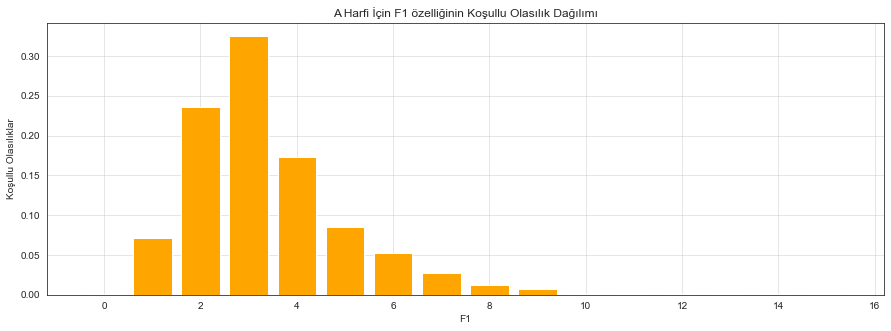

In [18]:
# Örnek görselleştirme
plt.figure(figsize=(15,5 ))
plt.bar(range(16), df[(df["Letter"] == "A") & (df["Feature"] == "F1")].Prob.values, color="orange")
plt.xlabel("F1")
plt.ylabel("Koşullu Olasılıklar")
plt.title("A Harfi İçin F1 özelliğinin Koşullu Olasılık Dağılımı")
plt.grid(True,alpha=0.6)
plt.show()

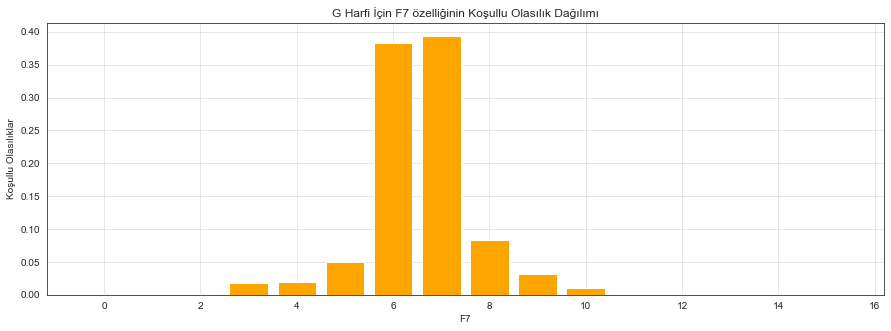

In [19]:
# Örnek görselleştirme - 2
plt.figure(figsize=(15,5 ))
plt.bar(range(16), df[(df["Letter"] == "G") & (df["Feature"] == "F7")].Prob.values, color="orange")
plt.xlabel("F7")
plt.ylabel("Koşullu Olasılıklar")
plt.title("G Harfi İçin F7 özelliğinin Koşullu Olasılık Dağılımı")
plt.grid(True,alpha=0.6)
plt.show()

<a id=7></a>
## Test Verisi Üzerinden Tahminde Bulunma

In [20]:
predictions = pd.DataFrame(columns=["Real_Val","Prediction","Accuracy"]) # Tahminlerin sonuçları dataframe içerisine aktarıltı
for i in range(len(test)): # Test verisi üzerindeki her bir veri döngü ile test edildi
    total = 0
    maximum = 0
    probs = [] # Argmax almak için her bir harfin olasılık sonuçları diziye aktarıldı
    print("----------------------------------------------------------")
    print(test.values[i])
    for j in letter_unique: # Her bir test verisi için 26 harf test edildi ve olasılıksal değerler diziye aktarıldı
        total = 0
        for k in range(1,num_features):
            total += df[(df["Letter"] == j) & (df["Feature"] == features[k]) & (df["Value"] == test.values[i][k])].Prob.values[0]
        total += np.log10(letter_num[test.values[i][0]] / sum(letter_num.values))
        probs.append(total)
    #print("probs ->",probs)
    predictions.loc[len(predictions.index)] = [test.values[i][0],letter_unique[np.argmax(probs)],test.values[i][0]==letter_unique[np.argmax(probs)]]
    # Diziye aktarılan değerler arasındaki maksimum orana sahip olan değer tahmin olarak alınıp prediction adlı dataframe içerisine aktarıldı
    print("İşlenen Veri -> ", (i+1), " || Max -> ", probs[np.argmax(probs)] , "Harf ->",letter_unique[np.argmax(probs)])

----------------------------------------------------------
['U' 4 10 6 7 9 9 6 4 3 6 7 7 9 8 5 6]
İşlenen Veri ->  1  || Max ->  1.4165852428152563 Harf -> B
----------------------------------------------------------
['N' 6 9 8 4 3 8 7 3 4 13 5 8 6 8 0 8]
İşlenen Veri ->  2  || Max ->  2.823788943753555 Harf -> I
----------------------------------------------------------
['V' 6 9 8 8 10 7 7 5 4 7 6 8 7 9 7 10]
İşlenen Veri ->  3  || Max ->  2.649945271642327 Harf -> I
----------------------------------------------------------
['I' 5 6 6 4 3 7 6 2 7 7 6 9 0 9 4 8]
İşlenen Veri ->  4  || Max ->  3.1789432501083326 Harf -> I
----------------------------------------------------------
['N' 5 9 7 6 4 9 7 3 5 10 4 6 5 8 1 7]
İşlenen Veri ->  5  || Max ->  2.31602300128253 Harf -> N
----------------------------------------------------------
['H' 5 8 8 6 6 5 8 3 6 10 8 8 4 8 4 6]
İşlenen Veri ->  6  || Max ->  2.0506971530713702 Harf -> H
--------------------------------------------------------

İşlenen Veri ->  53  || Max ->  2.2478873917035074 Harf -> W
----------------------------------------------------------
['N' 2 1 2 3 2 7 8 5 4 7 6 7 4 8 1 6]
İşlenen Veri ->  54  || Max ->  2.797386303489528 Harf -> I
----------------------------------------------------------
['H' 4 7 4 4 2 7 5 14 1 7 8 8 3 8 0 8]
İşlenen Veri ->  55  || Max ->  3.6283265353752094 Harf -> H
----------------------------------------------------------
['L' 5 10 4 5 2 9 3 4 4 12 4 13 2 6 6 9]
İşlenen Veri ->  56  || Max ->  1.0110632974286216 Harf -> J
----------------------------------------------------------
['B' 6 9 6 4 5 8 8 4 4 9 6 7 6 7 8 6]
İşlenen Veri ->  57  || Max ->  1.5430182829477384 Harf -> R
----------------------------------------------------------
['E' 5 11 5 8 3 3 8 6 11 7 6 15 0 8 7 7]
İşlenen Veri ->  58  || Max ->  2.5015999700148295 Harf -> E
----------------------------------------------------------
['Y' 5 8 5 6 3 5 9 1 7 9 9 5 1 11 3 5]
İşlenen Veri ->  59  || Max ->  1.83865889922

İşlenen Veri ->  105  || Max ->  2.56129730997695 Harf -> G
----------------------------------------------------------
['B' 3 7 4 5 4 7 7 8 5 7 6 7 2 8 7 9]
İşlenen Veri ->  106  || Max ->  3.664880009522115 Harf -> B
----------------------------------------------------------
['S' 4 11 4 8 4 8 6 7 7 7 8 9 2 10 10 7]
İşlenen Veri ->  107  || Max ->  1.4989181185916893 Harf -> G
----------------------------------------------------------
['T' 6 10 5 7 3 6 11 1 9 11 9 4 0 10 3 4]
İşlenen Veri ->  108  || Max ->  1.3830494142788892 Harf -> T
----------------------------------------------------------
['Q' 4 9 5 8 3 9 8 8 5 5 8 9 3 7 5 10]
İşlenen Veri ->  109  || Max ->  2.116565899840536 Harf -> R
----------------------------------------------------------
['V' 3 10 5 8 2 8 8 4 3 6 14 8 3 9 0 8]
İşlenen Veri ->  110  || Max ->  3.0348334499011473 Harf -> V
----------------------------------------------------------
['E' 4 8 5 6 5 6 8 7 9 6 4 10 3 8 6 8]
İşlenen Veri ->  111  || Max ->  2.1235

İşlenen Veri ->  157  || Max ->  2.29552637719521 Harf -> D
----------------------------------------------------------
['I' 4 9 6 6 3 9 8 2 8 7 6 6 0 8 4 7]
İşlenen Veri ->  158  || Max ->  2.8175571114944704 Harf -> I
----------------------------------------------------------
['H' 2 3 3 2 2 7 7 5 5 7 6 8 3 8 2 8]
İşlenen Veri ->  159  || Max ->  4.2381162288687655 Harf -> I
----------------------------------------------------------
['F' 4 6 6 4 3 6 11 4 5 12 7 5 2 9 2 6]
İşlenen Veri ->  160  || Max ->  2.2934321575207868 Harf -> F
----------------------------------------------------------
['S' 4 4 5 6 3 8 6 5 9 5 6 8 0 8 9 8]
İşlenen Veri ->  161  || Max ->  3.1173233991197433 Harf -> I
----------------------------------------------------------
['J' 4 8 5 6 2 10 6 2 8 14 3 8 0 7 0 8]
İşlenen Veri ->  162  || Max ->  2.193768885938007 Harf -> I
----------------------------------------------------------
['M' 8 11 11 8 7 12 5 3 6 10 2 6 10 9 2 9]
İşlenen Veri ->  163  || Max ->  0.51457

İşlenen Veri ->  209  || Max ->  2.9866968039384147 Harf -> X
----------------------------------------------------------
['P' 2 1 2 1 1 5 11 8 1 9 5 4 1 9 3 8]
İşlenen Veri ->  210  || Max ->  1.8736153401782936 Harf -> P
----------------------------------------------------------
['K' 3 6 4 4 3 6 7 4 7 6 6 10 3 8 5 9]
İşlenen Veri ->  211  || Max ->  2.6165537583273855 Harf -> K
----------------------------------------------------------
['U' 3 5 4 4 2 6 8 6 7 7 10 9 3 9 1 8]
İşlenen Veri ->  212  || Max ->  3.272610685080705 Harf -> U
----------------------------------------------------------
['P' 3 6 5 4 3 5 11 4 5 11 8 3 1 10 4 7]
İşlenen Veri ->  213  || Max ->  2.3958887656775256 Harf -> P
----------------------------------------------------------
['K' 7 10 10 8 7 4 7 2 7 10 10 11 3 8 3 6]
İşlenen Veri ->  214  || Max ->  2.4112992427280426 Harf -> K
----------------------------------------------------------
['W' 4 6 6 4 4 10 11 3 2 5 9 7 6 11 1 8]
İşlenen Veri ->  215  || Max ->  

İşlenen Veri ->  261  || Max ->  1.392215813460786 Harf -> B
----------------------------------------------------------
['Q' 7 10 9 8 8 8 5 8 4 6 7 8 4 6 7 8]
İşlenen Veri ->  262  || Max ->  1.8001165789026248 Harf -> M
----------------------------------------------------------
['D' 3 9 5 7 8 9 8 5 4 7 6 6 4 7 8 6]
İşlenen Veri ->  263  || Max ->  1.5821248446720488 Harf -> B
----------------------------------------------------------
['M' 7 10 10 8 6 5 7 3 5 10 10 10 8 5 3 7]
İşlenen Veri ->  264  || Max ->  1.044236632410071 Harf -> K
----------------------------------------------------------
['J' 2 11 3 8 3 7 7 1 6 11 5 9 1 6 2 5]
İşlenen Veri ->  265  || Max ->  1.2627377340423291 Harf -> J
----------------------------------------------------------
['N' 3 7 5 5 3 6 9 3 4 10 8 8 5 8 1 7]
İşlenen Veri ->  266  || Max ->  2.442405307759623 Harf -> N
----------------------------------------------------------
['A' 4 11 6 8 3 5 4 3 3 5 1 7 3 6 3 7]
İşlenen Veri ->  267  || Max ->  1.6096

İşlenen Veri ->  313  || Max ->  2.6009011540670888 Harf -> U
----------------------------------------------------------
['B' 10 13 7 8 5 10 5 5 6 11 3 9 6 7 7 11]
İşlenen Veri ->  314  || Max ->  0.955742589636156 Harf -> R
----------------------------------------------------------
['J' 4 11 6 8 4 10 5 4 5 14 4 10 0 7 1 6]
İşlenen Veri ->  315  || Max ->  1.584688953554524 Harf -> J
----------------------------------------------------------
['X' 7 10 10 8 6 4 8 2 8 10 11 10 3 9 3 5]
İşlenen Veri ->  316  || Max ->  1.512145258660696 Harf -> U
----------------------------------------------------------
['G' 2 2 4 4 2 7 6 6 5 6 6 9 2 9 4 9]
İşlenen Veri ->  317  || Max ->  3.34209730997695 Harf -> G
----------------------------------------------------------
['Z' 4 11 6 8 4 7 8 2 10 11 8 6 2 7 6 6]
İşlenen Veri ->  318  || Max ->  1.4481943926591794 Harf -> Z
----------------------------------------------------------
['D' 5 9 7 7 6 7 7 5 6 7 6 8 7 7 3 7]
İşlenen Veri ->  319  || Max ->  2

İşlenen Veri ->  365  || Max ->  2.716893298004445 Harf -> Y
----------------------------------------------------------
['I' 1 10 0 7 0 7 7 4 4 7 6 8 0 8 0 8]
İşlenen Veri ->  366  || Max ->  5.862111566940014 Harf -> I
----------------------------------------------------------
['T' 3 9 5 6 1 7 15 1 6 7 11 8 0 8 0 8]
İşlenen Veri ->  367  || Max ->  4.016330821088253 Harf -> I
----------------------------------------------------------
['Q' 1 0 1 1 0 8 7 6 3 6 6 9 2 8 2 8]
İşlenen Veri ->  368  || Max ->  2.629309588565037 Harf -> I
----------------------------------------------------------
['A' 2 4 4 6 2 7 3 3 3 7 1 8 3 6 3 8]
İşlenen Veri ->  369  || Max ->  2.8561435116449436 Harf -> A
----------------------------------------------------------
['U' 4 7 4 5 3 7 5 13 4 7 11 8 3 9 0 8]
İşlenen Veri ->  370  || Max ->  2.9655002463515063 Harf -> U
----------------------------------------------------------
['S' 2 6 3 4 3 8 8 7 6 7 4 6 2 6 8 8]
İşlenen Veri ->  371  || Max ->  1.8563920821

İşlenen Veri ->  417  || Max ->  3.1155521812137525 Harf -> I
----------------------------------------------------------
['K' 3 5 5 4 3 8 7 2 7 10 4 9 5 10 4 9]
İşlenen Veri ->  418  || Max ->  1.5378788100872194 Harf -> X
----------------------------------------------------------
['L' 2 5 4 4 2 7 4 1 8 8 2 10 0 7 2 8]
İşlenen Veri ->  419  || Max ->  2.6704653430619816 Harf -> L
----------------------------------------------------------
['K' 4 7 6 5 3 8 6 2 7 10 3 9 3 8 4 10]
İşlenen Veri ->  420  || Max ->  2.3094930029907674 Harf -> K
----------------------------------------------------------
['C' 1 0 1 1 0 6 7 6 8 7 6 14 0 8 4 10]
İşlenen Veri ->  421  || Max ->  3.1851780134803835 Harf -> I
----------------------------------------------------------
['Z' 2 5 3 3 2 7 8 5 9 6 6 9 2 8 7 8]
İşlenen Veri ->  422  || Max ->  2.9127214196862066 Harf -> Z
----------------------------------------------------------
['Y' 4 7 6 5 2 5 10 2 8 10 12 8 1 11 2 7]
İşlenen Veri ->  423  || Max ->  2.

İşlenen Veri ->  469  || Max ->  3.963586342280623 Harf -> I
----------------------------------------------------------
['K' 6 8 9 6 5 7 5 2 8 10 4 10 5 5 5 9]
İşlenen Veri ->  470  || Max ->  0.7257670088449839 Harf -> X
----------------------------------------------------------
['N' 8 11 11 8 7 4 11 3 4 10 10 8 6 8 1 7]
İşlenen Veri ->  471  || Max ->  1.5672078354057524 Harf -> N
----------------------------------------------------------
['X' 5 10 6 7 2 7 7 5 4 7 6 8 3 8 4 8]
İşlenen Veri ->  472  || Max ->  4.4382841055257165 Harf -> O
----------------------------------------------------------
['J' 6 11 7 8 3 9 5 4 7 15 4 11 1 6 1 7]
İşlenen Veri ->  473  || Max ->  1.3814369210341995 Harf -> J
----------------------------------------------------------
['A' 3 7 5 5 3 12 2 2 2 10 2 9 2 6 3 8]
İşlenen Veri ->  474  || Max ->  3.3815672404585033 Harf -> A
----------------------------------------------------------
['Z' 4 7 5 5 3 8 6 2 10 11 5 10 2 8 6 9]
İşlenen Veri ->  475  || Max ->

İşlenen Veri ->  521  || Max ->  1.140667551045563 Harf -> N
----------------------------------------------------------
['T' 7 9 7 7 4 5 11 2 8 11 10 5 1 11 2 4]
İşlenen Veri ->  522  || Max ->  1.7926543438514888 Harf -> Y
----------------------------------------------------------
['F' 5 7 7 5 3 7 9 2 7 14 5 5 2 8 3 8]
İşlenen Veri ->  523  || Max ->  2.2753846877491792 Harf -> O
----------------------------------------------------------
['M' 5 9 7 7 6 7 6 3 4 10 8 9 11 5 3 9]
İşlenen Veri ->  524  || Max ->  1.4026357461062353 Harf -> M
----------------------------------------------------------
['S' 3 7 4 5 2 7 6 5 9 5 6 10 0 9 9 8]
İşlenen Veri ->  525  || Max ->  2.363504605078176 Harf -> Z
----------------------------------------------------------
['S' 3 5 5 3 2 8 6 2 7 10 7 9 2 9 5 8]
İşlenen Veri ->  526  || Max ->  2.1184152993545426 Harf -> S
----------------------------------------------------------
['S' 7 10 8 7 5 8 7 3 6 10 5 7 2 8 5 9]
İşlenen Veri ->  527  || Max ->  2.97

İşlenen Veri ->  573  || Max ->  2.005604220427686 Harf -> A
----------------------------------------------------------
['F' 3 5 6 4 2 6 12 3 5 13 7 3 1 10 2 6]
İşlenen Veri ->  574  || Max ->  2.196253474135207 Harf -> F
----------------------------------------------------------
['U' 7 10 8 8 5 5 7 6 8 9 7 9 5 11 5 3]
İşlenen Veri ->  575  || Max ->  1.0880346686882034 Harf -> E
----------------------------------------------------------
['P' 4 4 5 6 5 9 10 2 3 7 9 5 4 10 5 5]
İşlenen Veri ->  576  || Max ->  1.3794756604442697 Harf -> Y
----------------------------------------------------------
['J' 2 4 4 3 1 9 6 3 6 14 5 10 0 7 0 8]
İşlenen Veri ->  577  || Max ->  2.7001361080260686 Harf -> J
----------------------------------------------------------
['A' 1 1 2 1 0 7 4 3 0 7 1 8 2 7 1 8]
İşlenen Veri ->  578  || Max ->  2.3283068296716607 Harf -> I
----------------------------------------------------------
['R' 2 3 4 1 2 9 7 4 5 9 4 7 2 6 4 10]
İşlenen Veri ->  579  || Max ->  1.890

İşlenen Veri ->  625  || Max ->  1.8843412484298783 Harf -> F
----------------------------------------------------------
['Q' 3 6 4 8 4 8 6 7 5 9 6 7 3 8 5 7]
İşlenen Veri ->  626  || Max ->  2.833961482325842 Harf -> O
----------------------------------------------------------
['G' 3 6 4 4 2 6 7 6 5 10 8 11 2 9 4 10]
İşlenen Veri ->  627  || Max ->  2.5532973099769505 Harf -> G
----------------------------------------------------------
['S' 7 10 8 8 4 8 7 4 8 11 6 7 2 9 5 8]
İşlenen Veri ->  628  || Max ->  2.7071383507641613 Harf -> S
----------------------------------------------------------
['Z' 4 10 5 8 3 7 7 4 15 9 6 8 0 8 8 8]
İşlenen Veri ->  629  || Max ->  4.46059292981019 Harf -> I
----------------------------------------------------------
['O' 3 1 4 3 2 7 7 7 4 7 6 7 2 8 3 7]
İşlenen Veri ->  630  || Max ->  3.4618261662630214 Harf -> O
----------------------------------------------------------
['I' 4 8 6 9 6 9 8 6 7 7 4 7 3 10 9 9]
İşlenen Veri ->  631  || Max ->  1.397074

İşlenen Veri ->  677  || Max ->  2.389078168062759 Harf -> I
----------------------------------------------------------
['N' 5 10 6 8 6 7 7 13 1 6 6 8 5 8 0 8]
İşlenen Veri ->  678  || Max ->  3.5267592407832575 Harf -> I
----------------------------------------------------------
['W' 8 9 8 7 7 5 11 3 3 9 8 7 7 12 3 6]
İşlenen Veri ->  679  || Max ->  1.3973309529117748 Harf -> W
----------------------------------------------------------
['L' 3 7 5 5 4 7 6 7 5 6 6 8 3 8 4 10]
İşlenen Veri ->  680  || Max ->  3.1134248924731436 Harf -> O
----------------------------------------------------------
['L' 4 7 4 5 2 1 1 5 5 1 1 6 0 8 0 8]
İşlenen Veri ->  681  || Max ->  1.9269169559652066 Harf -> L
----------------------------------------------------------
['U' 3 2 4 4 1 7 5 12 5 7 14 7 3 9 0 8]
İşlenen Veri ->  682  || Max ->  2.56610539007314 Harf -> U
----------------------------------------------------------
['I' 3 8 4 6 2 7 7 0 8 14 6 8 0 8 1 8]
İşlenen Veri ->  683  || Max ->  5.099735

İşlenen Veri ->  729  || Max ->  1.86924179908298 Harf -> J
----------------------------------------------------------
['G' 5 9 4 4 3 8 6 4 2 9 6 8 3 9 8 8]
İşlenen Veri ->  730  || Max ->  2.6106560401356806 Harf -> O
----------------------------------------------------------
['H' 5 8 7 6 7 7 7 6 6 7 6 8 3 8 3 7]
İşlenen Veri ->  731  || Max ->  3.998944231535477 Harf -> H
----------------------------------------------------------
['B' 2 1 3 1 2 7 7 5 5 7 6 6 1 8 5 9]
İşlenen Veri ->  732  || Max ->  2.8856496097019475 Harf -> I
----------------------------------------------------------
['I' 3 7 4 5 2 8 6 0 7 13 6 9 0 7 2 8]
İşlenen Veri ->  733  || Max ->  2.786203976180939 Harf -> I
----------------------------------------------------------
['D' 1 0 1 1 1 6 7 8 6 7 6 6 2 8 3 8]
İşlenen Veri ->  734  || Max ->  3.0775983858342144 Harf -> I
----------------------------------------------------------
['O' 4 4 5 6 2 8 8 9 8 5 8 10 3 8 4 8]
İşlenen Veri ->  735  || Max ->  2.5427785472154

İşlenen Veri ->  781  || Max ->  2.0018961073640478 Harf -> F
----------------------------------------------------------
['C' 3 6 5 5 4 6 6 4 5 7 6 11 4 10 7 10]
İşlenen Veri ->  782  || Max ->  1.7770968028825445 Harf -> B
----------------------------------------------------------
['O' 2 4 3 3 2 7 7 7 4 7 5 8 2 8 3 8]
İşlenen Veri ->  783  || Max ->  4.123730928167784 Harf -> O
----------------------------------------------------------
['V' 2 6 4 4 2 9 11 3 4 4 11 8 2 10 1 8]
İşlenen Veri ->  784  || Max ->  3.1481874871682285 Harf -> V
----------------------------------------------------------
['M' 7 10 9 8 9 8 7 6 5 6 7 8 8 6 2 7]
İşlenen Veri ->  785  || Max ->  2.5020333364676812 Harf -> M
----------------------------------------------------------
['R' 4 7 5 5 3 11 7 3 6 11 2 6 3 7 3 10]
İşlenen Veri ->  786  || Max ->  1.9694078652930156 Harf -> D
----------------------------------------------------------
['O' 4 8 6 6 5 7 7 8 4 7 7 9 3 8 3 7]
İşlenen Veri ->  787  || Max ->  3.66

İşlenen Veri ->  833  || Max ->  4.645939949778299 Harf -> I
----------------------------------------------------------
['V' 7 10 7 8 3 3 11 4 4 10 12 8 2 10 1 8]
İşlenen Veri ->  834  || Max ->  3.062783760460154 Harf -> V
----------------------------------------------------------
['Q' 4 6 5 8 4 8 7 6 3 8 7 10 3 8 6 8]
İşlenen Veri ->  835  || Max ->  2.9143906323270983 Harf -> Q
----------------------------------------------------------
['G' 4 6 4 4 3 7 6 6 5 9 6 13 2 8 4 10]
İşlenen Veri ->  836  || Max ->  2.884497309976951 Harf -> G
----------------------------------------------------------
['W' 4 10 6 8 4 10 8 5 2 7 8 8 8 9 0 8]
İşlenen Veri ->  837  || Max ->  3.052338902037371 Harf -> W
----------------------------------------------------------
['Q' 2 1 3 2 1 8 6 7 5 6 6 8 3 8 4 8]
İşlenen Veri ->  838  || Max ->  3.3768186251829846 Harf -> O
----------------------------------------------------------
['G' 9 14 8 8 5 7 4 6 3 8 5 4 4 8 6 6]
İşlenen Veri ->  839  || Max ->  0.8431

İşlenen Veri ->  885  || Max ->  3.025777148664626 Harf -> D
----------------------------------------------------------
['O' 3 5 4 4 3 7 7 8 5 7 6 8 2 8 3 8]
İşlenen Veri ->  886  || Max ->  4.518969023405878 Harf -> O
----------------------------------------------------------
['C' 6 11 6 8 3 5 8 7 8 13 10 11 2 10 3 7]
İşlenen Veri ->  887  || Max ->  1.6926172819974001 Harf -> C
----------------------------------------------------------
['X' 4 8 6 6 3 6 8 1 8 10 8 9 3 8 3 7]
İşlenen Veri ->  888  || Max ->  2.317442145553321 Harf -> X
----------------------------------------------------------
['L' 7 13 6 8 3 10 2 4 4 13 4 13 2 8 6 9]
İşlenen Veri ->  889  || Max ->  1.3880624668011199 Harf -> B
----------------------------------------------------------
['T' 3 1 4 3 2 7 12 4 6 7 11 8 2 11 1 8]
İşlenen Veri ->  890  || Max ->  3.1038869369482875 Harf -> V
----------------------------------------------------------
['B' 6 9 8 7 6 10 6 3 7 10 3 7 6 8 7 11]
İşlenen Veri ->  891  || Max ->  

İşlenen Veri ->  937  || Max ->  3.100144724415046 Harf -> U
----------------------------------------------------------
['R' 8 14 6 8 5 8 7 5 5 9 4 9 7 5 6 11]
İşlenen Veri ->  938  || Max ->  1.416878818293999 Harf -> R
----------------------------------------------------------
['E' 2 3 3 5 2 3 7 6 10 7 6 14 0 8 7 8]
İşlenen Veri ->  939  || Max ->  3.3940415875943084 Harf -> I
----------------------------------------------------------
['B' 10 15 10 8 8 9 7 4 5 9 5 7 7 5 9 8]
İşlenen Veri ->  940  || Max ->  1.2370116115737761 Harf -> S
----------------------------------------------------------
['U' 5 7 5 5 3 3 9 5 6 10 10 9 3 9 2 7]
İşlenen Veri ->  941  || Max ->  2.522232470254683 Harf -> U
----------------------------------------------------------
['D' 1 0 2 1 1 6 7 8 6 7 6 6 2 8 3 8]
İşlenen Veri ->  942  || Max ->  3.1155521812137525 Harf -> I
----------------------------------------------------------
['R' 1 0 2 0 1 6 10 7 2 7 5 8 2 7 4 9]
İşlenen Veri ->  943  || Max ->  1.5245

İşlenen Veri ->  989  || Max ->  1.8554397319793425 Harf -> E
----------------------------------------------------------
['A' 3 6 5 8 2 7 6 3 1 7 0 8 3 7 1 8]
İşlenen Veri ->  990  || Max ->  2.9762486689307126 Harf -> H
----------------------------------------------------------
['R' 3 2 4 3 3 7 7 5 5 6 5 6 3 7 4 8]
İşlenen Veri ->  991  || Max ->  2.446457523076619 Harf -> O
----------------------------------------------------------
['A' 3 8 5 6 3 8 3 2 2 6 1 8 2 6 2 7]
İşlenen Veri ->  992  || Max ->  3.3908122327543433 Harf -> A
----------------------------------------------------------
['J' 3 4 4 6 1 11 2 11 3 12 9 14 1 6 0 8]
İşlenen Veri ->  993  || Max ->  1.5570466771317601 Harf -> J
----------------------------------------------------------
['D' 4 4 5 6 3 5 7 9 9 6 5 5 3 8 4 8]
İşlenen Veri ->  994  || Max ->  2.82088418230377 Harf -> D
----------------------------------------------------------
['B' 4 10 5 7 7 8 7 6 5 7 6 6 6 8 6 10]
İşlenen Veri ->  995  || Max ->  3.21286762

İşlenen Veri ->  1040  || Max ->  2.2057320360957604 Harf -> C
----------------------------------------------------------
['D' 2 3 4 2 2 8 7 5 6 9 5 5 2 8 3 7]
İşlenen Veri ->  1041  || Max ->  2.729141063037714 Harf -> D
----------------------------------------------------------
['P' 4 9 4 4 3 8 9 3 3 11 5 5 4 11 5 7]
İşlenen Veri ->  1042  || Max ->  1.2387864126194676 Harf -> S
----------------------------------------------------------
['V' 3 8 5 6 2 6 11 2 4 8 12 8 2 10 1 8]
İşlenen Veri ->  1043  || Max ->  3.2988086051806507 Harf -> V
----------------------------------------------------------
['L' 4 8 5 6 3 2 4 2 8 2 0 9 0 7 1 6]
İşlenen Veri ->  1044  || Max ->  1.7559492140297228 Harf -> L
----------------------------------------------------------
['P' 5 5 5 7 3 4 13 9 2 10 6 3 1 10 4 8]
İşlenen Veri ->  1045  || Max ->  2.409713650470152 Harf -> P
----------------------------------------------------------
['S' 5 10 7 8 5 7 7 4 7 10 9 9 3 9 5 6]
İşlenen Veri ->  1046  || Max ->

İşlenen Veri ->  1091  || Max ->  1.493880763828149 Harf -> U
----------------------------------------------------------
['X' 3 4 5 3 2 10 7 2 8 10 3 7 2 7 3 9]
İşlenen Veri ->  1092  || Max ->  1.805019785304873 Harf -> X
----------------------------------------------------------
['Q' 3 5 4 6 4 8 7 7 3 5 7 10 3 8 5 10]
İşlenen Veri ->  1093  || Max ->  2.7273858779689375 Harf -> Q
----------------------------------------------------------
['A' 4 9 6 6 2 7 6 3 1 7 0 8 3 7 2 8]
İşlenen Veri ->  1094  || Max ->  3.064729470266272 Harf -> H
----------------------------------------------------------
['N' 6 10 9 8 9 6 8 3 5 8 7 7 9 8 8 4]
İşlenen Veri ->  1095  || Max ->  1.31526734855998 Harf -> B
----------------------------------------------------------
['X' 7 11 8 6 4 7 8 2 8 11 7 8 5 11 4 7]
İşlenen Veri ->  1096  || Max ->  1.8531564312676065 Harf -> X
----------------------------------------------------------
['R' 5 10 7 8 6 7 8 6 5 8 5 9 4 6 6 12]
İşlenen Veri ->  1097  || Max ->  1

İşlenen Veri ->  1142  || Max ->  1.370787202008822 Harf -> P
----------------------------------------------------------
['I' 3 7 4 5 2 7 7 0 8 14 6 8 0 8 1 8]
İşlenen Veri ->  1143  || Max ->  5.005675923375659 Harf -> I
----------------------------------------------------------
['E' 5 10 7 8 5 10 7 2 9 11 3 8 3 8 5 12]
İşlenen Veri ->  1144  || Max ->  2.200367561806637 Harf -> X
----------------------------------------------------------
['Q' 5 7 6 9 6 8 5 8 4 6 5 9 4 8 6 9]
İşlenen Veri ->  1145  || Max ->  2.0538518050687786 Harf -> Q
----------------------------------------------------------
['Z' 1 3 2 2 1 7 7 5 8 6 6 8 2 8 6 8]
İşlenen Veri ->  1146  || Max ->  3.91933880439765 Harf -> I
----------------------------------------------------------
['S' 2 6 3 4 2 9 9 5 9 5 5 5 0 7 8 8]
İşlenen Veri ->  1147  || Max ->  1.4214286876973812 Harf -> J
----------------------------------------------------------
['W' 7 11 7 8 7 2 10 2 3 10 10 8 7 11 1 7]
İşlenen Veri ->  1148  || Max ->  1

İşlenen Veri ->  1193  || Max ->  2.0354926226169834 Harf -> R
----------------------------------------------------------
['T' 4 9 5 7 3 5 14 1 6 9 10 7 0 8 0 8]
İşlenen Veri ->  1194  || Max ->  2.136792867292874 Harf -> I
----------------------------------------------------------
['Y' 3 6 4 4 1 8 11 2 2 5 12 8 1 11 0 8]
İşlenen Veri ->  1195  || Max ->  2.843225109267763 Harf -> Y
----------------------------------------------------------
['J' 3 5 4 6 4 9 9 5 6 7 5 8 3 10 8 9]
İşlenen Veri ->  1196  || Max ->  2.1108694440739537 Harf -> H
----------------------------------------------------------
['J' 3 11 4 8 3 9 6 3 7 12 4 9 1 6 2 6]
İşlenen Veri ->  1197  || Max ->  1.635095457619565 Harf -> J
----------------------------------------------------------
['A' 6 12 6 6 5 9 4 5 3 10 5 12 7 3 6 11]
İşlenen Veri ->  1198  || Max ->  0.8990781808687711 Harf -> R
----------------------------------------------------------
['F' 9 13 7 7 4 6 11 3 5 13 6 4 2 8 6 6]
İşlenen Veri ->  1199  || Ma

İşlenen Veri ->  1244  || Max ->  2.640456047747194 Harf -> D
----------------------------------------------------------
['M' 5 11 6 8 4 8 7 12 2 6 9 8 8 6 0 8]
İşlenen Veri ->  1245  || Max ->  2.8107682762267157 Harf -> M
----------------------------------------------------------
['W' 4 4 5 2 3 4 11 3 2 9 9 7 6 11 1 6]
İşlenen Veri ->  1246  || Max ->  2.1556775347877686 Harf -> W
----------------------------------------------------------
['H' 7 11 9 8 6 7 7 6 7 7 6 6 6 8 4 7]
İşlenen Veri ->  1247  || Max ->  2.9889413113770162 Harf -> I
----------------------------------------------------------
['N' 5 11 6 8 3 7 7 15 2 4 6 8 6 8 0 8]
İşlenen Veri ->  1248  || Max ->  3.612567821641343 Harf -> I
----------------------------------------------------------
['S' 4 5 6 3 3 8 7 2 8 10 5 7 1 8 5 8]
İşlenen Veri ->  1249  || Max ->  2.5943688648603462 Harf -> S
----------------------------------------------------------
['I' 5 12 4 6 2 12 4 3 5 12 2 7 2 8 2 11]
İşlenen Veri ->  1250  || Max 

İşlenen Veri ->  1295  || Max ->  5.038679223705691 Harf -> I
----------------------------------------------------------
['U' 6 10 9 8 12 8 8 4 4 6 7 8 10 5 9 8]
İşlenen Veri ->  1296  || Max ->  1.7741144307745236 Harf -> M
----------------------------------------------------------
['C' 5 11 4 6 3 5 9 4 4 9 7 9 3 9 8 8]
İşlenen Veri ->  1297  || Max ->  2.3124803806308663 Harf -> U
----------------------------------------------------------
['F' 1 1 2 2 1 6 10 4 4 10 8 5 1 9 3 7]
İşlenen Veri ->  1298  || Max ->  1.535906961174679 Harf -> P
----------------------------------------------------------
['C' 3 7 4 5 2 5 8 6 7 11 8 13 1 9 3 8]
İşlenen Veri ->  1299  || Max ->  2.723764822981006 Harf -> C
----------------------------------------------------------
['I' 2 9 2 7 2 7 7 0 9 7 6 8 0 8 3 8]
İşlenen Veri ->  1300  || Max ->  5.269702326015922 Harf -> I
----------------------------------------------------------
['U' 8 9 9 7 5 5 6 6 9 8 6 8 5 9 5 2]
İşlenen Veri ->  1301  || Max ->  1.

İşlenen Veri ->  1346  || Max ->  1.7526798064236087 Harf -> F
----------------------------------------------------------
['H' 4 9 6 6 7 7 8 6 7 7 5 8 3 8 3 8]
İşlenen Veri ->  1347  || Max ->  3.842016017845994 Harf -> H
----------------------------------------------------------
['F' 4 10 6 8 5 7 9 3 5 12 7 6 2 9 2 7]
İşlenen Veri ->  1348  || Max ->  2.0081656998405366 Harf -> F
----------------------------------------------------------
['V' 6 8 6 6 3 3 12 4 4 10 12 7 2 10 1 8]
İşlenen Veri ->  1349  || Max ->  2.8438396610812715 Harf -> V
----------------------------------------------------------
['X' 3 4 5 3 2 7 8 1 8 10 7 8 2 8 3 7]
İşlenen Veri ->  1350  || Max ->  2.916821027540898 Harf -> X
----------------------------------------------------------
['I' 1 3 0 2 0 7 7 1 7 7 6 8 0 8 2 8]
İşlenen Veri ->  1351  || Max ->  5.631088464629783 Harf -> I
----------------------------------------------------------
['E' 5 9 4 4 2 9 6 4 4 11 4 10 3 8 6 11]
İşlenen Veri ->  1352  || Max -> 

İşlenen Veri ->  1397  || Max ->  0.9606365537470858 Harf -> R
----------------------------------------------------------
['R' 2 4 4 3 2 8 8 3 5 9 4 7 2 6 3 10]
İşlenen Veri ->  1398  || Max ->  1.7312970729316486 Harf -> B
----------------------------------------------------------
['Z' 1 3 2 1 1 8 7 1 8 11 6 8 1 8 5 8]
İşlenen Veri ->  1399  || Max ->  3.4341902895461653 Harf -> I
----------------------------------------------------------
['K' 6 11 8 8 6 4 7 2 7 10 10 12 3 8 4 7]
İşlenen Veri ->  1400  || Max ->  2.2848624611188466 Harf -> K
----------------------------------------------------------
['F' 3 5 5 3 2 7 9 2 6 13 6 5 4 9 3 7]
İşlenen Veri ->  1401  || Max ->  1.6828773530617498 Harf -> N
----------------------------------------------------------
['N' 3 2 4 4 3 7 9 5 4 7 7 7 5 9 2 6]
İşlenen Veri ->  1402  || Max ->  2.090114628454726 Harf -> N
----------------------------------------------------------
['L' 2 0 2 1 0 2 1 6 5 0 2 4 0 8 0 8]
İşlenen Veri ->  1403  || Max ->  

İşlenen Veri ->  1448  || Max ->  1.5943725963922606 Harf -> F
----------------------------------------------------------
['H' 4 5 5 4 4 7 7 6 6 7 6 8 3 8 3 7]
İşlenen Veri ->  1449  || Max ->  4.207625366760853 Harf -> H
----------------------------------------------------------
['Y' 3 8 5 6 2 8 10 2 2 6 12 8 1 11 0 8]
İşlenen Veri ->  1450  || Max ->  3.2648385034838974 Harf -> Y
----------------------------------------------------------
['S' 1 3 2 2 1 8 7 6 5 7 6 7 2 8 8 8]
İşlenen Veri ->  1451  || Max ->  3.1882804948293133 Harf -> I
----------------------------------------------------------
['Y' 3 9 5 6 1 7 10 3 2 7 13 8 2 11 0 8]
İşlenen Veri ->  1452  || Max ->  2.871371587235564 Harf -> V
----------------------------------------------------------
['K' 4 8 6 6 5 8 5 1 6 10 4 9 3 8 4 10]
İşlenen Veri ->  1453  || Max ->  2.007920447633853 Harf -> Q
----------------------------------------------------------
['Y' 3 9 5 6 1 7 11 1 3 7 12 8 1 10 0 8]
İşlenen Veri ->  1454  || Max ->

İşlenen Veri ->  1499  || Max ->  1.9115182218472073 Harf -> J
----------------------------------------------------------
['V' 4 6 5 4 2 4 12 3 3 10 11 7 2 10 1 8]
İşlenen Veri ->  1500  || Max ->  3.3484980461744396 Harf -> V
----------------------------------------------------------
['N' 4 6 4 4 2 7 7 14 1 5 6 8 6 8 0 8]
İşlenen Veri ->  1501  || Max ->  3.695076072466426 Harf -> I
----------------------------------------------------------
['P' 5 10 7 8 6 5 11 7 4 10 7 2 2 11 4 7]
İşlenen Veri ->  1502  || Max ->  1.0948134968603216 Harf -> P
----------------------------------------------------------
['L' 2 6 4 4 2 6 4 1 9 8 2 11 0 7 2 8]
İşlenen Veri ->  1503  || Max ->  2.4559492140297223 Harf -> L
----------------------------------------------------------
['N' 4 7 6 5 3 11 6 4 5 10 1 5 5 9 1 7]
İşlenen Veri ->  1504  || Max ->  1.5450909317722612 Harf -> N
----------------------------------------------------------
['M' 7 6 7 8 4 8 7 13 2 6 9 8 9 6 0 8]
İşlenen Veri ->  1505  || Ma

İşlenen Veri ->  1550  || Max ->  2.6154241223889083 Harf -> Z
----------------------------------------------------------
['H' 6 11 9 9 8 10 6 3 6 10 3 7 6 8 5 10]
İşlenen Veri ->  1551  || Max ->  1.5507126587903957 Harf -> B
----------------------------------------------------------
['V' 8 11 8 8 5 3 12 2 3 9 10 7 5 11 2 6]
İşlenen Veri ->  1552  || Max ->  1.1502784528141807 Harf -> W
----------------------------------------------------------
['K' 5 8 8 6 4 4 8 3 7 10 10 11 4 8 4 6]
İşlenen Veri ->  1553  || Max ->  2.0451251868988134 Harf -> K
----------------------------------------------------------
['O' 3 7 5 5 3 8 6 7 4 7 5 8 3 8 3 7]
İşlenen Veri ->  1554  || Max ->  3.6586515630884184 Harf -> O
----------------------------------------------------------
['K' 4 9 6 7 8 7 7 3 4 6 6 8 7 8 8 7]
İşlenen Veri ->  1555  || Max ->  3.1993694933170334 Harf -> X
----------------------------------------------------------
['A' 9 15 7 8 4 8 1 2 2 9 4 12 4 5 5 6]
İşlenen Veri ->  1556  || M

İşlenen Veri ->  1601  || Max ->  5.622837639547275 Harf -> I
----------------------------------------------------------
['T' 6 9 5 4 2 5 10 2 7 13 7 5 2 8 4 4]
İşlenen Veri ->  1602  || Max ->  1.4036048695940213 Harf -> D
----------------------------------------------------------
['Z' 5 8 7 6 4 8 7 2 10 12 6 7 1 7 6 7]
İşlenen Veri ->  1603  || Max ->  2.3383970953618824 Harf -> Z
----------------------------------------------------------
['F' 4 8 6 6 4 6 10 2 5 13 7 5 2 10 2 7]
İşlenen Veri ->  1604  || Max ->  2.4219588032888124 Harf -> F
----------------------------------------------------------
['I' 2 2 2 4 2 7 7 1 8 7 6 8 0 8 3 8]
İşlenen Veri ->  1605  || Max ->  5.119537309514272 Harf -> I
----------------------------------------------------------
['H' 6 10 7 6 5 8 7 3 5 10 7 7 7 11 5 8]
İşlenen Veri ->  1606  || Max ->  1.8003545422523433 Harf -> S
----------------------------------------------------------
['S' 3 6 5 4 5 8 7 4 3 8 5 8 4 9 10 10]
İşlenen Veri ->  1607  || Max 

İşlenen Veri ->  1652  || Max ->  1.6765441192713246 Harf -> T
----------------------------------------------------------
['X' 3 7 4 4 1 7 7 5 4 7 6 8 3 8 4 8]
İşlenen Veri ->  1653  || Max ->  4.519582235338697 Harf -> I
----------------------------------------------------------
['U' 6 10 7 8 4 4 8 6 8 9 9 9 3 10 2 5]
İşlenen Veri ->  1654  || Max ->  1.94432021609432 Harf -> U
----------------------------------------------------------
['B' 4 7 6 5 4 7 8 6 5 9 6 6 3 8 6 8]
İşlenen Veri ->  1655  || Max ->  3.185696757273848 Harf -> O
----------------------------------------------------------
['P' 3 9 4 6 2 5 10 10 3 9 6 4 2 10 4 8]
İşlenen Veri ->  1656  || Max ->  2.518776630500874 Harf -> P
----------------------------------------------------------
['E' 3 8 3 6 2 3 7 6 11 7 6 15 0 8 6 7]
İşlenen Veri ->  1657  || Max ->  3.0409062740629547 Harf -> I
----------------------------------------------------------
['H' 5 9 7 7 7 7 7 5 7 7 6 7 6 8 4 7]
İşlenen Veri ->  1658  || Max ->  3.08

İşlenen Veri ->  1703  || Max ->  1.3499946421112907 Harf -> R
----------------------------------------------------------
['U' 5 7 7 5 8 7 7 4 4 7 7 8 10 9 6 8]
İşlenen Veri ->  1704  || Max ->  2.6879479828044253 Harf -> I
----------------------------------------------------------
['L' 3 3 3 5 1 0 1 6 6 0 0 6 0 8 0 8]
İşlenen Veri ->  1705  || Max ->  2.346271794674885 Harf -> L
----------------------------------------------------------
['H' 5 7 8 5 6 9 7 3 7 10 3 7 5 8 4 9]
İşlenen Veri ->  1706  || Max ->  1.970217302753244 Harf -> B
----------------------------------------------------------
['L' 2 7 2 5 1 0 1 5 6 0 0 7 0 8 0 8]
İşlenen Veri ->  1707  || Max ->  2.2817556656426268 Harf -> L
----------------------------------------------------------
['T' 6 7 6 5 4 7 10 2 7 11 9 5 3 11 4 4]
İşlenen Veri ->  1708  || Max ->  1.6739328826642743 Harf -> Y
----------------------------------------------------------
['V' 3 8 4 6 3 7 11 2 3 6 11 9 2 10 1 9]
İşlenen Veri ->  1709  || Max ->  

İşlenen Veri ->  1754  || Max ->  2.3017321316484045 Harf -> M
----------------------------------------------------------
['B' 5 9 7 7 10 9 9 5 4 7 8 6 6 10 10 10]
İşlenen Veri ->  1755  || Max ->  0.8785023005437871 Harf -> B
----------------------------------------------------------
['P' 3 5 5 7 7 8 10 4 0 8 7 6 7 10 4 7]
İşlenen Veri ->  1756  || Max ->  1.3928165690569423 Harf -> P
----------------------------------------------------------
['V' 3 5 4 4 2 5 12 2 3 8 11 7 2 11 1 8]
İşlenen Veri ->  1757  || Max ->  2.791044630025371 Harf -> V
----------------------------------------------------------
['H' 6 7 9 5 6 10 6 3 6 10 3 7 3 7 3 9]
İşlenen Veri ->  1758  || Max ->  1.7001128458927386 Harf -> H
----------------------------------------------------------
['B' 5 11 7 9 8 8 7 5 6 6 6 5 3 8 6 10]
İşlenen Veri ->  1759  || Max ->  2.4992453345995145 Harf -> B
----------------------------------------------------------
['A' 2 5 4 4 3 9 8 3 4 6 7 8 4 8 4 6]
İşlenen Veri ->  1760  || Ma

İşlenen Veri ->  1805  || Max ->  1.73824959896947 Harf -> X
----------------------------------------------------------
['N' 5 11 5 8 3 7 7 15 2 4 6 8 6 8 0 8]
İşlenen Veri ->  1806  || Max ->  3.653821947053885 Harf -> I
----------------------------------------------------------
['Q' 4 11 6 9 3 9 8 9 6 5 7 10 3 8 5 9]
İşlenen Veri ->  1807  || Max ->  2.052267019014896 Harf -> Q
----------------------------------------------------------
['G' 6 10 8 7 6 6 6 6 6 6 6 10 4 8 5 9]
İşlenen Veri ->  1808  || Max ->  2.3660973099769502 Harf -> G
----------------------------------------------------------
['A' 3 8 4 6 3 8 3 2 2 7 1 8 2 6 2 7]
İşlenen Veri ->  1809  || Max ->  3.452445514726608 Harf -> A
----------------------------------------------------------
['P' 1 0 2 0 0 5 11 6 1 9 6 5 1 9 3 8]
İşlenen Veri ->  1810  || Max ->  1.5694678747405058 Harf -> P
----------------------------------------------------------
['T' 5 9 5 7 3 6 11 2 8 11 9 4 1 11 3 4]
İşlenen Veri ->  1811  || Max ->  1

İşlenen Veri ->  1856  || Max ->  0.9855734037867003 Harf -> A
----------------------------------------------------------
['B' 3 6 4 4 3 6 6 8 6 6 6 7 2 8 9 10]
İşlenen Veri ->  1857  || Max ->  3.019369173608803 Harf -> B
----------------------------------------------------------
['X' 6 9 9 7 5 7 7 0 8 10 7 9 2 8 3 7]
İşlenen Veri ->  1858  || Max ->  2.491355189031582 Harf -> X
----------------------------------------------------------
['O' 7 11 9 8 6 7 7 9 5 6 7 11 5 8 5 7]
İşlenen Veri ->  1859  || Max ->  1.7951594995963542 Harf -> O
----------------------------------------------------------
['W' 6 7 6 5 5 6 11 4 2 8 7 6 9 12 4 5]
İşlenen Veri ->  1860  || Max ->  0.9855662470294215 Harf -> W
----------------------------------------------------------
['F' 6 9 9 7 4 7 10 2 8 14 6 3 1 10 3 8]
İşlenen Veri ->  1861  || Max ->  2.145737990360547 Harf -> P
----------------------------------------------------------
['E' 0 0 1 1 0 5 7 5 7 7 6 12 0 8 6 10]
İşlenen Veri ->  1862  || Max ->

İşlenen Veri ->  1907  || Max ->  2.9657075140718723 Harf -> O
----------------------------------------------------------
['J' 3 11 4 9 3 9 7 2 7 11 3 7 1 6 2 6]
İşlenen Veri ->  1908  || Max ->  1.18794098607485 Harf -> J
----------------------------------------------------------
['Y' 2 6 4 4 1 7 9 2 2 7 12 8 2 11 0 8]
İşlenen Veri ->  1909  || Max ->  2.7021169288504705 Harf -> V
----------------------------------------------------------
['H' 3 6 4 4 5 9 9 4 3 6 7 7 6 9 5 6]
İşlenen Veri ->  1910  || Max ->  1.1019606164770985 Harf -> Q
----------------------------------------------------------
['P' 5 9 6 6 3 5 10 10 5 8 5 5 2 10 4 8]
İşlenen Veri ->  1911  || Max ->  2.044122252620691 Harf -> P
----------------------------------------------------------
['S' 5 11 7 8 7 8 7 7 5 6 6 8 3 8 9 7]
İşlenen Veri ->  1912  || Max ->  3.0327720868456582 Harf -> O
----------------------------------------------------------
['N' 5 8 7 6 4 6 9 2 4 9 8 8 6 7 2 7]
İşlenen Veri ->  1913  || Max ->  1

İşlenen Veri ->  1958  || Max ->  3.1606098474166746 Harf -> X
----------------------------------------------------------
['D' 3 10 5 8 9 9 9 4 4 7 6 6 4 8 7 5]
İşlenen Veri ->  1959  || Max ->  1.990793575322204 Harf -> B
----------------------------------------------------------
['E' 3 8 5 6 5 7 7 3 5 6 7 10 4 10 8 8]
İşlenen Veri ->  1960  || Max ->  2.110305450005395 Harf -> X
----------------------------------------------------------
['W' 4 6 6 4 2 7 8 4 1 7 8 8 8 9 0 8]
İşlenen Veri ->  1961  || Max ->  2.6008285681740952 Harf -> W
----------------------------------------------------------
['U' 5 6 5 4 2 4 9 5 7 12 11 8 3 9 1 6]
İşlenen Veri ->  1962  || Max ->  2.70377558674485 Harf -> U
----------------------------------------------------------
['D' 5 4 5 6 3 5 7 10 9 6 6 5 3 8 4 8]
İşlenen Veri ->  1963  || Max ->  3.1193342364379077 Harf -> X
----------------------------------------------------------
['T' 2 3 3 1 1 5 11 1 7 11 9 5 0 9 2 5]
İşlenen Veri ->  1964  || Max ->  1.

İşlenen Veri ->  2009  || Max ->  1.8755273123712952 Harf -> M
----------------------------------------------------------
['V' 5 5 6 4 2 4 12 3 3 10 11 7 2 10 1 8]
İşlenen Veri ->  2010  || Max ->  3.146634692137172 Harf -> V
----------------------------------------------------------
['Q' 5 8 7 7 5 7 4 4 4 5 3 8 3 7 5 8]
İşlenen Veri ->  2011  || Max ->  2.0260249743893333 Harf -> O
----------------------------------------------------------
['N' 3 7 4 5 2 7 7 14 2 5 6 8 5 8 0 8]
İşlenen Veri ->  2012  || Max ->  3.708277392598439 Harf -> I
----------------------------------------------------------
['L' 4 7 5 5 3 7 4 1 7 8 2 9 1 6 2 8]
İşlenen Veri ->  2013  || Max ->  2.0204653430619803 Harf -> L
----------------------------------------------------------
['X' 7 13 7 7 4 7 7 2 9 9 5 8 4 7 4 8]
İşlenen Veri ->  2014  || Max ->  2.416821027540898 Harf -> X
----------------------------------------------------------
['E' 6 11 9 8 5 5 9 3 11 11 8 8 2 8 5 5]
İşlenen Veri ->  2015  || Max ->  

İşlenen Veri ->  2060  || Max ->  1.6633381136336405 Harf -> F
----------------------------------------------------------
['G' 4 11 5 8 5 7 7 8 6 5 7 9 2 7 6 10]
İşlenen Veri ->  2061  || Max ->  2.2156973099769504 Harf -> G
----------------------------------------------------------
['X' 5 10 7 8 4 10 7 1 8 10 2 6 3 9 4 10]
İşlenen Veri ->  2062  || Max ->  1.791044630025371 Harf -> X
----------------------------------------------------------
['I' 4 10 5 8 2 7 7 0 9 14 6 8 0 8 1 8]
İşlenen Veri ->  2063  || Max ->  4.931418497633084 Harf -> I
----------------------------------------------------------
['B' 3 6 5 4 4 7 9 4 5 9 6 6 2 8 5 6]
İşlenen Veri ->  2064  || Max ->  2.6277283067357375 Harf -> B
----------------------------------------------------------
['Z' 2 5 4 6 4 9 6 5 4 7 3 6 2 7 7 6]
İşlenen Veri ->  2065  || Max ->  1.670853584358619 Harf -> B
----------------------------------------------------------
['J' 3 8 5 6 2 8 5 4 5 14 7 12 1 6 0 7]
İşlenen Veri ->  2066  || Max -> 

İşlenen Veri ->  2111  || Max ->  1.785248282005574 Harf -> W
----------------------------------------------------------
['R' 3 4 5 3 3 8 7 4 5 9 4 7 2 7 4 10]
İşlenen Veri ->  2112  || Max ->  2.3043176437426123 Harf -> R
----------------------------------------------------------
['A' 5 10 7 8 8 8 7 8 4 6 6 8 3 8 8 3]
İşlenen Veri ->  2113  || Max ->  3.04649007656778 Harf -> O
----------------------------------------------------------
['Q' 5 9 5 4 3 10 5 4 6 11 4 8 3 8 7 11]
İşlenen Veri ->  2114  || Max ->  1.9904312599976215 Harf -> H
----------------------------------------------------------
['B' 6 6 6 8 5 6 6 9 7 6 6 7 3 8 10 10]
İşlenen Veri ->  2115  || Max ->  2.220607563701682 Harf -> B
----------------------------------------------------------
['E' 2 5 3 4 3 7 7 6 7 7 6 9 2 8 6 10]
İşlenen Veri ->  2116  || Max ->  3.2737518687490064 Harf -> E
----------------------------------------------------------
['L' 5 6 6 6 5 8 9 3 6 6 6 9 3 9 7 9]
İşlenen Veri ->  2117  || Max ->  2.

İşlenen Veri ->  2162  || Max ->  1.8699429253602977 Harf -> D
----------------------------------------------------------
['W' 6 8 6 6 4 2 10 2 3 11 11 9 6 10 2 6]
İşlenen Veri ->  2163  || Max ->  1.315315413492584 Harf -> F
----------------------------------------------------------
['N' 5 9 8 7 4 3 10 3 4 10 10 9 5 8 1 7]
İşlenen Veri ->  2164  || Max ->  1.810493775374157 Harf -> N
----------------------------------------------------------
['G' 9 15 8 8 5 10 3 3 3 9 3 6 4 7 5 9]
İşlenen Veri ->  2165  || Max ->  0.8415087292265429 Harf -> R
----------------------------------------------------------
['D' 3 7 4 5 4 6 7 9 7 8 8 6 2 9 3 8]
İşlenen Veri ->  2166  || Max ->  2.0120156807747174 Harf -> D
----------------------------------------------------------
['O' 2 4 3 2 2 8 7 7 4 7 6 8 2 8 2 8]
İşlenen Veri ->  2167  || Max ->  3.8983341027709573 Harf -> O
----------------------------------------------------------
['U' 4 5 5 4 3 6 8 6 7 7 9 10 3 9 1 8]
İşlenen Veri ->  2168  || Max ->

İşlenen Veri ->  2213  || Max ->  3.171349975786832 Harf -> O
----------------------------------------------------------
['X' 5 10 7 7 6 7 6 3 5 6 6 8 3 9 9 9]
İşlenen Veri ->  2214  || Max ->  2.1547745525670807 Harf -> H
----------------------------------------------------------
['X' 6 11 6 6 3 11 7 3 8 10 3 6 4 11 4 10]
İşlenen Veri ->  2215  || Max ->  1.474274443689967 Harf -> X
----------------------------------------------------------
['J' 4 11 5 9 3 7 8 2 7 15 5 8 1 6 1 7]
İşlenen Veri ->  2216  || Max ->  1.6510095424360895 Harf -> Z
----------------------------------------------------------
['N' 5 6 8 4 4 8 8 2 5 10 4 6 5 9 1 7]
İşlenen Veri ->  2217  || Max ->  1.849988246148249 Harf -> N
----------------------------------------------------------
['K' 6 10 8 8 5 6 6 2 7 10 6 10 4 8 4 8]
İşlenen Veri ->  2218  || Max ->  2.360396122859404 Harf -> K
----------------------------------------------------------
['U' 7 15 6 8 5 7 6 4 5 7 7 8 5 7 3 7]
İşlenen Veri ->  2219  || Max -

İşlenen Veri ->  2264  || Max ->  1.867596260862521 Harf -> N
----------------------------------------------------------
['I' 3 9 4 6 2 7 7 0 8 14 6 9 0 8 1 8]
İşlenen Veri ->  2265  || Max ->  4.510626418425164 Harf -> I
----------------------------------------------------------
['F' 5 7 6 9 7 7 9 5 5 8 6 8 3 9 7 6]
İşlenen Veri ->  2266  || Max ->  2.2719699481771025 Harf -> U
----------------------------------------------------------
['A' 4 10 7 7 3 12 3 4 3 11 1 9 2 7 3 9]
İşlenen Veri ->  2267  || Max ->  1.5649262543259914 Harf -> A
----------------------------------------------------------
['N' 2 4 4 3 2 7 9 2 4 10 6 7 5 9 0 7]
İşlenen Veri ->  2268  || Max ->  2.6920103630518826 Harf -> N
----------------------------------------------------------
['J' 2 7 4 5 3 10 6 2 5 8 4 5 3 8 6 7]
İşlenen Veri ->  2269  || Max ->  1.790432221996383 Harf -> D
----------------------------------------------------------
['L' 3 6 5 5 4 7 8 3 5 7 6 8 3 9 7 11]
İşlenen Veri ->  2270  || Max ->  2.

İşlenen Veri ->  2315  || Max ->  2.0294447091300256 Harf -> R
----------------------------------------------------------
['F' 3 1 3 2 2 5 10 4 5 11 9 5 1 10 3 6]
İşlenen Veri ->  2316  || Max ->  2.356128082285677 Harf -> F
----------------------------------------------------------
['T' 3 5 4 4 2 6 12 3 6 7 11 9 2 11 1 8]
İşlenen Veri ->  2317  || Max ->  2.5619614711097785 Harf -> V
----------------------------------------------------------
['C' 2 4 3 3 1 4 9 5 7 11 9 12 1 9 2 7]
İşlenen Veri ->  2318  || Max ->  1.6483549869154326 Harf -> C
----------------------------------------------------------
['K' 3 3 4 5 2 3 6 7 3 7 7 12 3 8 3 10]
İşlenen Veri ->  2319  || Max ->  2.2117918535654804 Harf -> O
----------------------------------------------------------
['G' 3 3 4 4 2 7 8 7 6 6 6 7 2 7 6 11]
İşlenen Veri ->  2320  || Max ->  2.289475638150325 Harf -> B
----------------------------------------------------------
['H' 5 10 8 8 5 8 5 3 6 9 5 8 4 7 4 8]
İşlenen Veri ->  2321  || Max 

İşlenen Veri ->  2366  || Max ->  0.6946984309203414 Harf -> T
----------------------------------------------------------
['H' 1 0 1 0 0 7 7 10 2 7 6 8 2 8 0 8]
İşlenen Veri ->  2367  || Max ->  4.351977615007379 Harf -> I
----------------------------------------------------------
['O' 6 10 4 5 3 6 8 6 5 9 7 9 5 10 5 8]
İşlenen Veri ->  2368  || Max ->  1.6110325154693699 Harf -> O
----------------------------------------------------------
['E' 2 3 4 2 2 6 8 2 8 11 8 9 2 9 4 7]
İşlenen Veri ->  2369  || Max ->  2.2149689262298122 Harf -> C
----------------------------------------------------------
['Y' 6 9 6 6 3 2 11 4 6 13 12 6 1 11 2 5]
İşlenen Veri ->  2370  || Max ->  1.777776098613273 Harf -> Y
----------------------------------------------------------
['M' 4 2 5 3 3 8 6 6 4 6 7 8 7 6 2 6]
İşlenen Veri ->  2371  || Max ->  2.5848646617688864 Harf -> M
----------------------------------------------------------
['E' 5 5 5 8 3 3 8 6 12 7 6 15 0 8 7 6]
İşlenen Veri ->  2372  || Max ->

İşlenen Veri ->  2417  || Max ->  2.056778180511194 Harf -> B
----------------------------------------------------------
['L' 2 6 2 4 1 0 1 5 6 0 0 7 0 8 0 8]
İşlenen Veri ->  2418  || Max ->  2.264013730158755 Harf -> L
----------------------------------------------------------
['W' 2 0 2 1 1 8 8 4 0 7 8 8 6 9 0 8]
İşlenen Veri ->  2419  || Max ->  1.9076648161868144 Harf -> W
----------------------------------------------------------
['F' 1 0 1 0 0 3 11 4 3 11 9 7 0 8 2 8]
İşlenen Veri ->  2420  || Max ->  2.109472382232914 Harf -> I
----------------------------------------------------------
['T' 4 10 6 8 4 9 14 0 5 6 10 8 0 8 0 8]
İşlenen Veri ->  2421  || Max ->  2.867815969603106 Harf -> I
----------------------------------------------------------
['I' 0 8 0 5 0 7 7 4 4 7 6 8 0 8 0 8]
İşlenen Veri ->  2422  || Max ->  5.604685824365757 Harf -> I
----------------------------------------------------------
['Y' 5 6 7 9 9 8 10 4 3 6 8 9 5 13 8 8]
İşlenen Veri ->  2423  || Max ->  1.40

İşlenen Veri ->  2468  || Max ->  2.404497309976951 Harf -> G
----------------------------------------------------------
['M' 14 15 14 8 7 10 11 7 4 4 6 10 10 13 3 6]
İşlenen Veri ->  2469  || Max ->  0.4090423248019701 Harf -> O
----------------------------------------------------------
['D' 4 9 6 7 4 9 6 5 7 9 3 6 3 8 3 8]
İşlenen Veri ->  2470  || Max ->  2.8422909101325153 Harf -> D
----------------------------------------------------------
['A' 3 8 5 6 3 11 3 3 2 10 2 9 2 7 3 9]
İşlenen Veri ->  2471  || Max ->  2.840735191151877 Harf -> A
----------------------------------------------------------
['J' 2 7 4 5 1 9 6 3 6 15 4 9 0 7 1 7]
İşlenen Veri ->  2472  || Max ->  2.5619247259122484 Harf -> J
----------------------------------------------------------
['M' 5 7 7 6 8 5 8 5 4 6 5 9 11 9 4 8]
İşlenen Veri ->  2473  || Max ->  1.9206168991602055 Harf -> U
----------------------------------------------------------
['F' 5 9 7 6 4 5 12 2 6 13 7 4 1 10 2 7]
İşlenen Veri ->  2474  || M

İşlenen Veri ->  2519  || Max ->  2.940409019457271 Harf -> O
----------------------------------------------------------
['Z' 3 8 4 6 3 7 8 3 12 8 6 8 0 8 7 7]
İşlenen Veri ->  2520  || Max ->  3.3500318737045807 Harf -> I
----------------------------------------------------------
['I' 5 9 4 4 2 7 10 2 5 13 5 4 1 9 5 8]
İşlenen Veri ->  2521  || Max ->  1.9384678200768495 Harf -> P
----------------------------------------------------------
['P' 8 12 7 6 4 9 8 4 5 13 4 4 4 10 6 7]
İşlenen Veri ->  2522  || Max ->  1.2038764768910433 Harf -> P
----------------------------------------------------------
['G' 3 5 4 3 2 6 7 5 5 9 7 10 2 9 4 9]
İşlenen Veri ->  2523  || Max ->  2.9788973099769502 Harf -> G
----------------------------------------------------------
['P' 4 10 5 7 2 3 13 8 2 11 7 3 1 10 4 8]
İşlenen Veri ->  2524  || Max ->  2.3928165690569423 Harf -> P
----------------------------------------------------------
['O' 4 8 6 7 5 8 4 5 5 9 4 10 4 7 5 7]
İşlenen Veri ->  2525  || Max

İşlenen Veri ->  2570  || Max ->  0.5448954376850053 Harf -> A
----------------------------------------------------------
['R' 8 15 8 8 6 8 6 3 5 9 4 8 6 8 6 7]
İşlenen Veri ->  2571  || Max ->  1.6004257770448727 Harf -> O
----------------------------------------------------------
['G' 4 6 5 4 3 6 7 6 6 10 7 11 2 9 4 10]
İşlenen Veri ->  2572  || Max ->  2.7404973099769507 Harf -> G
----------------------------------------------------------
['L' 3 6 4 4 2 5 5 1 9 7 2 11 0 8 3 7]
İşlenen Veri ->  2573  || Max ->  1.9251017744470549 Harf -> I
----------------------------------------------------------
['B' 4 3 5 5 4 6 7 9 7 7 6 7 2 8 9 9]
İşlenen Veri ->  2574  || Max ->  3.395530164320876 Harf -> B
----------------------------------------------------------
['W' 3 4 5 3 3 7 11 2 2 7 9 8 7 11 1 8]
İşlenen Veri ->  2575  || Max ->  3.1429589338338735 Harf -> W
----------------------------------------------------------
['V' 9 13 9 7 4 6 10 4 3 8 8 5 5 12 3 8]
İşlenen Veri ->  2576  || Max -

İşlenen Veri ->  2621  || Max ->  2.5604506794452115 Harf -> H
----------------------------------------------------------
['K' 3 6 4 4 1 3 6 7 3 7 7 11 3 8 2 10]
İşlenen Veri ->  2622  || Max ->  1.8267343823011124 Harf -> K
----------------------------------------------------------
['X' 4 9 6 6 4 7 7 3 8 5 6 7 3 9 7 6]
İşlenen Veri ->  2623  || Max ->  2.8438396610812715 Harf -> X
----------------------------------------------------------
['T' 3 4 4 3 1 5 11 2 7 11 9 4 1 10 2 5]
İşlenen Veri ->  2624  || Max ->  1.7113398832652735 Harf -> T
----------------------------------------------------------
['N' 5 8 7 6 7 6 8 3 4 8 7 9 6 9 5 5]
İşlenen Veri ->  2625  || Max ->  1.2170275111806448 Harf -> U
----------------------------------------------------------
['V' 6 11 6 8 4 3 11 3 4 9 11 8 3 11 1 7]
İşlenen Veri ->  2626  || Max ->  2.2646471144974205 Harf -> V
----------------------------------------------------------
['U' 3 5 4 3 2 7 9 6 7 7 9 9 3 9 1 8]
İşlenen Veri ->  2627  || Max -

İşlenen Veri ->  2672  || Max ->  2.9001741271691737 Harf -> B
----------------------------------------------------------
['O' 6 11 7 8 5 7 7 8 5 10 6 8 3 8 3 8]
İşlenen Veri ->  2673  || Max ->  4.1888102932471485 Harf -> O
----------------------------------------------------------
['Z' 4 9 5 7 5 8 8 3 8 7 7 7 1 8 11 7]
İşlenen Veri ->  2674  || Max ->  1.9274205131896474 Harf -> X
----------------------------------------------------------
['Q' 3 3 4 4 3 7 8 5 3 8 8 10 3 9 5 8]
İşlenen Veri ->  2675  || Max ->  2.4607006701845444 Harf -> U
----------------------------------------------------------
['K' 9 15 9 8 6 2 9 3 6 9 9 12 4 7 3 6]
İşlenen Veri ->  2676  || Max ->  0.4717560273227577 Harf -> F
----------------------------------------------------------
['N' 6 10 9 7 5 10 7 3 5 10 3 5 6 9 1 7]
İşlenen Veri ->  2677  || Max ->  1.7283452761640463 Harf -> N
----------------------------------------------------------
['X' 3 4 5 3 2 7 7 4 9 6 6 8 2 8 6 8]
İşlenen Veri ->  2678  || Max -

İşlenen Veri ->  2723  || Max ->  1.8073342177122305 Harf -> N
----------------------------------------------------------
['V' 4 8 4 6 3 4 11 2 2 9 10 8 3 12 1 8]
İşlenen Veri ->  2724  || Max ->  2.662162642447732 Harf -> V
----------------------------------------------------------
['N' 9 13 8 7 4 5 9 4 6 3 4 11 6 10 2 7]
İşlenen Veri ->  2725  || Max ->  0.8792686296531791 Harf -> F
----------------------------------------------------------
['P' 9 10 7 5 3 7 9 7 5 14 4 4 4 10 4 8]
İşlenen Veri ->  2726  || Max ->  1.9212343877973415 Harf -> P
----------------------------------------------------------
['K' 1 0 1 0 0 4 6 6 2 7 6 11 3 7 2 10]
İşlenen Veri ->  2727  || Max ->  1.1584256795096513 Harf -> K
----------------------------------------------------------
['F' 5 10 8 8 5 6 10 3 6 13 7 5 2 9 3 7]
İşlenen Veri ->  2728  || Max ->  1.824780119903233 Harf -> F
----------------------------------------------------------
['R' 5 9 5 4 3 8 8 3 5 9 2 6 5 6 5 7]
İşlenen Veri ->  2729  || Ma

İşlenen Veri ->  2774  || Max ->  3.1958662442306034 Harf -> O
----------------------------------------------------------
['U' 4 4 5 3 2 4 7 5 8 10 8 9 4 11 3 4]
İşlenen Veri ->  2775  || Max ->  1.2933279307371066 Harf -> X
----------------------------------------------------------
['G' 3 6 4 4 4 7 8 5 3 6 6 9 3 7 6 8]
İşlenen Veri ->  2776  || Max ->  2.324286129852726 Harf -> X
----------------------------------------------------------
['L' 4 9 5 8 5 7 6 5 5 7 7 8 3 9 8 11]
İşlenen Veri ->  2777  || Max ->  2.7130742933328325 Harf -> U
----------------------------------------------------------
['A' 2 7 3 5 2 12 3 2 2 10 2 9 2 6 2 8]
İşlenen Veri ->  2778  || Max ->  3.09959497543539 Harf -> A
----------------------------------------------------------
['I' 1 5 2 3 1 7 7 0 7 13 6 8 0 8 1 8]
İşlenen Veri ->  2779  || Max ->  5.5865340091842395 Harf -> I
----------------------------------------------------------
['U' 2 3 3 2 1 5 8 5 6 10 9 9 3 10 2 6]
İşlenen Veri ->  2780  || Max ->  2

İşlenen Veri ->  2825  || Max ->  5.466071962979618 Harf -> I
----------------------------------------------------------
['I' 0 0 0 0 0 7 7 4 4 7 6 8 0 8 0 8]
İşlenen Veri ->  2826  || Max ->  5.466071962979618 Harf -> I
----------------------------------------------------------
['I' 0 6 0 4 0 7 7 5 3 7 6 8 0 8 0 8]
İşlenen Veri ->  2827  || Max ->  5.251550510834404 Harf -> I
----------------------------------------------------------
['F' 4 10 4 8 3 1 13 4 3 12 10 6 0 8 2 6]
İşlenen Veri ->  2828  || Max ->  2.0144352923170254 Harf -> F
----------------------------------------------------------
['I' 4 10 6 8 7 8 9 3 5 9 5 4 6 9 7 2]
İşlenen Veri ->  2829  || Max ->  1.038183905005795 Harf -> R
----------------------------------------------------------
['W' 3 2 5 4 3 7 10 2 2 7 9 8 7 11 0 8]
İşlenen Veri ->  2830  || Max ->  3.1254708575222674 Harf -> W
----------------------------------------------------------
['S' 4 10 5 7 4 7 7 5 8 4 6 10 1 10 9 9]
İşlenen Veri ->  2831  || Max ->  

İşlenen Veri ->  2876  || Max ->  1.6637045717016101 Harf -> U
----------------------------------------------------------
['D' 3 6 4 4 4 8 7 5 8 7 7 5 3 8 3 7]
İşlenen Veri ->  2877  || Max ->  2.92180161349643 Harf -> D
----------------------------------------------------------
['S' 5 11 6 8 4 8 7 3 6 10 7 9 2 10 5 8]
İşlenen Veri ->  2878  || Max ->  2.1947005398188866 Harf -> S
----------------------------------------------------------
['U' 4 9 6 6 5 8 8 8 5 6 7 9 3 8 4 6]
İşlenen Veri ->  2879  || Max ->  2.61178893832855 Harf -> O
----------------------------------------------------------
['E' 4 9 3 4 2 8 7 3 4 10 5 8 3 9 8 11]
İşlenen Veri ->  2880  || Max ->  2.2485042077693698 Harf -> X
----------------------------------------------------------
['B' 1 3 3 2 2 9 6 3 5 10 5 7 2 8 4 9]
İşlenen Veri ->  2881  || Max ->  2.458997656580938 Harf -> B
----------------------------------------------------------
['I' 3 7 4 5 2 6 8 0 7 13 7 8 0 8 1 7]
İşlenen Veri ->  2882  || Max ->  3.15

İşlenen Veri ->  2927  || Max ->  2.2028678787277762 Harf -> B
----------------------------------------------------------
['A' 2 6 4 4 2 8 3 2 2 7 1 8 2 6 2 6]
İşlenen Veri ->  2928  || Max ->  3.165850753555575 Harf -> A
----------------------------------------------------------
['L' 4 10 6 7 4 9 3 2 7 8 2 9 3 4 4 9]
İşlenen Veri ->  2929  || Max ->  1.44748706382345 Harf -> A
----------------------------------------------------------
['Z' 3 5 6 4 3 7 7 2 10 12 6 8 1 8 6 8]
İşlenen Veri ->  2930  || Max ->  3.907653852118638 Harf -> Z
----------------------------------------------------------
['E' 2 1 2 3 2 7 7 6 6 7 6 8 2 8 5 10]
İşlenen Veri ->  2931  || Max ->  3.573909574392989 Harf -> I
----------------------------------------------------------
['E' 2 4 2 3 2 7 7 5 7 7 6 8 2 8 5 10]
İşlenen Veri ->  2932  || Max ->  3.8478369671322636 Harf -> I
----------------------------------------------------------
['N' 1 0 2 1 1 7 7 11 1 5 6 8 4 8 0 8]
İşlenen Veri ->  2933  || Max ->  3.855

İşlenen Veri ->  2978  || Max ->  1.767692474683493 Harf -> X
----------------------------------------------------------
['A' 1 0 2 0 0 7 4 2 0 7 2 8 2 6 1 8]
İşlenen Veri ->  2979  || Max ->  2.4755579954662066 Harf -> A
----------------------------------------------------------
['W' 5 8 7 6 3 10 8 5 1 7 8 8 8 9 0 8]
İşlenen Veri ->  2980  || Max ->  2.599238743054859 Harf -> W
----------------------------------------------------------
['R' 3 8 5 6 4 8 7 4 5 9 3 8 3 7 4 11]
İşlenen Veri ->  2981  || Max ->  2.6583143810998715 Harf -> R
----------------------------------------------------------
['I' 1 10 0 7 0 7 7 4 4 7 6 8 0 8 0 8]
İşlenen Veri ->  2982  || Max ->  5.862111566940014 Harf -> I
----------------------------------------------------------
['D' 5 9 6 7 7 7 7 7 6 7 6 4 3 8 3 8]
İşlenen Veri ->  2983  || Max ->  3.8753038706684126 Harf -> O
----------------------------------------------------------
['W' 4 5 6 4 6 8 7 4 4 6 5 8 9 8 6 9]
İşlenen Veri ->  2984  || Max ->  2.3178

İşlenen Veri ->  3029  || Max ->  1.20245334757117 Harf -> C
----------------------------------------------------------
['U' 4 6 4 4 2 7 4 14 5 7 13 8 3 9 0 8]
İşlenen Veri ->  3030  || Max ->  3.100144724415046 Harf -> U
----------------------------------------------------------
['H' 3 4 5 2 2 7 6 3 5 10 6 9 3 7 3 8]
İşlenen Veri ->  3031  || Max ->  2.888760592136479 Harf -> H
----------------------------------------------------------
['F' 3 6 5 4 2 6 11 2 5 13 7 4 1 10 2 8]
İşlenen Veri ->  3032  || Max ->  2.254800970391269 Harf -> P
----------------------------------------------------------
['S' 5 10 6 8 5 7 7 5 8 5 6 11 1 10 10 9]
İşlenen Veri ->  3033  || Max ->  1.713166767240338 Harf -> Z
----------------------------------------------------------
['M' 5 9 6 7 4 8 7 13 2 6 9 8 8 6 0 8]
İşlenen Veri ->  3034  || Max ->  2.673720083455632 Harf -> M
----------------------------------------------------------
['G' 7 10 7 8 5 5 7 6 6 9 7 12 2 9 4 10]
İşlenen Veri ->  3035  || Max -> 

İşlenen Veri ->  3080  || Max ->  1.5724931914589393 Harf -> K
----------------------------------------------------------
['Q' 5 10 7 8 7 8 5 8 3 6 7 8 4 7 7 8]
İşlenen Veri ->  3081  || Max ->  1.7022154505798095 Harf -> O
----------------------------------------------------------
['O' 5 10 4 6 3 6 7 6 3 9 7 9 5 9 5 8]
İşlenen Veri ->  3082  || Max ->  2.1552483884852434 Harf -> G
----------------------------------------------------------
['S' 4 6 5 4 3 7 7 3 7 10 5 7 2 8 5 8]
İşlenen Veri ->  3083  || Max ->  2.9608029483130522 Harf -> B
----------------------------------------------------------
['E' 4 6 6 6 6 6 8 4 4 8 7 9 4 11 8 10]
İşlenen Veri ->  3084  || Max ->  1.1547918877466734 Harf -> R
----------------------------------------------------------
['I' 1 6 2 4 2 7 7 1 8 7 6 9 0 8 3 8]
İşlenen Veri ->  3085  || Max ->  4.754850840867408 Harf -> I
----------------------------------------------------------
['L' 4 6 5 5 4 8 5 5 6 6 7 8 3 8 6 9]
İşlenen Veri ->  3086  || Max ->  2.

İşlenen Veri ->  3131  || Max ->  1.2693568648020495 Harf -> B
----------------------------------------------------------
['D' 6 9 8 7 5 10 6 4 9 11 3 6 3 8 3 9]
İşlenen Veri ->  3132  || Max ->  1.911098249582057 Harf -> D
----------------------------------------------------------
['J' 4 8 5 6 3 9 7 2 6 14 3 7 0 7 0 8]
İşlenen Veri ->  3133  || Max ->  2.2334694413594023 Harf -> J
----------------------------------------------------------
['T' 2 4 3 3 2 7 12 3 6 7 11 8 2 11 1 8]
İşlenen Veri ->  3134  || Max ->  2.8041974959544986 Harf -> V
----------------------------------------------------------
['Y' 3 3 4 2 1 4 11 2 7 11 10 5 1 11 2 5]
İşlenen Veri ->  3135  || Max ->  2.1354625521901376 Harf -> Y
----------------------------------------------------------
['V' 2 3 3 2 1 4 12 3 2 10 11 7 2 11 0 8]
İşlenen Veri ->  3136  || Max ->  2.21185208344152 Harf -> V
----------------------------------------------------------
['V' 4 11 6 8 9 7 6 5 2 8 7 9 8 10 4 9]
İşlenen Veri ->  3137  || M

İşlenen Veri ->  3182  || Max ->  2.511463446340522 Harf -> K
----------------------------------------------------------
['B' 3 7 3 5 4 6 6 8 5 6 7 7 2 9 7 10]
İşlenen Veri ->  3183  || Max ->  2.120020566797657 Harf -> G
----------------------------------------------------------
['B' 9 12 8 7 7 10 7 4 6 10 3 6 7 4 8 8]
İşlenen Veri ->  3184  || Max ->  1.2404805056355774 Harf -> D
----------------------------------------------------------
['K' 4 6 6 4 4 7 6 1 6 10 6 9 3 8 3 8]
İşlenen Veri ->  3185  || Max ->  3.4604205203911427 Harf -> H
----------------------------------------------------------
['K' 6 11 8 8 10 7 7 4 5 6 6 9 8 9 8 7]
İşlenen Veri ->  3186  || Max ->  1.6993694933170331 Harf -> X
----------------------------------------------------------
['N' 8 12 10 7 4 12 4 3 3 13 1 7 5 7 0 8]
İşlenen Veri ->  3187  || Max ->  1.0381977017025203 Harf -> J
----------------------------------------------------------
['M' 5 7 7 5 5 8 7 2 4 9 7 8 7 6 2 8]
İşlenen Veri ->  3188  || Max -

İşlenen Veri ->  3233  || Max ->  2.1256260673830694 Harf -> V
----------------------------------------------------------
['D' 1 4 3 2 2 9 6 3 5 10 5 6 2 8 2 8]
İşlenen Veri ->  3234  || Max ->  2.0434251542695723 Harf -> B
----------------------------------------------------------
['E' 2 1 2 2 2 7 7 5 7 6 5 8 2 8 6 10]
İşlenen Veri ->  3235  || Max ->  2.6498171651520654 Harf -> I
----------------------------------------------------------
['G' 4 7 5 5 3 5 7 5 5 9 8 10 2 8 4 9]
İşlenen Veri ->  3236  || Max ->  2.649297309976951 Harf -> G
----------------------------------------------------------
['Y' 3 10 5 7 1 7 10 2 2 7 13 8 2 11 0 8]
İşlenen Veri ->  3237  || Max ->  2.832570619161218 Harf -> Y
----------------------------------------------------------
['H' 3 4 4 6 4 11 5 2 2 8 5 9 3 8 5 11]
İşlenen Veri ->  3238  || Max ->  1.5441159255103794 Harf -> Q
----------------------------------------------------------
['E' 4 9 3 5 3 8 6 3 5 10 5 8 3 9 8 11]
İşlenen Veri ->  3239  || Max -

İşlenen Veri ->  3284  || Max ->  1.7382491282450594 Harf -> R
----------------------------------------------------------
['W' 5 11 7 8 4 5 8 5 2 7 8 8 8 10 0 8]
İşlenen Veri ->  3285  || Max ->  3.049159251798897 Harf -> W
----------------------------------------------------------
['B' 4 9 4 7 4 7 7 10 7 7 6 7 2 8 9 9]
İşlenen Veri ->  3286  || Max ->  3.460545644197037 Harf -> B
----------------------------------------------------------
['A' 4 7 6 5 6 8 5 7 4 8 6 8 5 9 7 4]
İşlenen Veri ->  3287  || Max ->  1.6401408702185731 Harf -> O
----------------------------------------------------------
['W' 4 9 7 6 5 7 8 4 1 7 9 8 7 11 0 8]
İşlenen Veri ->  3288  || Max ->  2.966488345598579 Harf -> W
----------------------------------------------------------
['C' 5 10 6 8 4 5 8 9 9 9 9 12 2 10 4 9]
İşlenen Veri ->  3289  || Max ->  1.774584495112154 Harf -> C
----------------------------------------------------------
['Y' 3 6 4 4 2 3 11 2 7 11 10 6 1 11 2 5]
İşlenen Veri ->  3290  || Max -> 

İşlenen Veri ->  3335  || Max ->  1.1618396610812713 Harf -> G
----------------------------------------------------------
['G' 2 0 2 1 1 8 6 6 5 6 5 9 1 8 5 10]
İşlenen Veri ->  3336  || Max ->  1.86849730997695 Harf -> G
----------------------------------------------------------
['X' 9 12 8 6 4 7 7 2 9 9 5 8 4 5 4 8]
İşlenen Veri ->  3337  || Max ->  2.384212331888725 Harf -> X
----------------------------------------------------------
['R' 7 10 9 8 7 8 8 5 6 9 5 7 4 7 6 12]
İşlenen Veri ->  3338  || Max ->  1.5930615262874734 Harf -> R
----------------------------------------------------------
['U' 4 10 5 8 2 7 5 14 5 7 15 8 3 9 0 8]
İşlenen Veri ->  3339  || Max ->  3.2287377652622475 Harf -> U
----------------------------------------------------------
['C' 5 10 7 8 8 7 5 4 4 8 6 11 7 9 4 8]
İşlenen Veri ->  3340  || Max ->  1.757785274206457 Harf -> I
----------------------------------------------------------
['O' 5 9 6 7 3 7 7 9 8 7 6 8 3 8 4 8]
İşlenen Veri ->  3341  || Max ->  4

İşlenen Veri ->  3386  || Max ->  2.0940973099769504 Harf -> G
----------------------------------------------------------
['Q' 5 9 6 11 6 8 7 6 3 8 8 11 3 8 6 8]
İşlenen Veri ->  3387  || Max ->  2.4833288256709967 Harf -> Q
----------------------------------------------------------
['X' 4 9 6 7 5 8 6 3 5 6 7 7 2 8 9 9]
İşlenen Veri ->  3388  || Max ->  2.819845853031735 Harf -> B
----------------------------------------------------------
['Q' 3 3 4 5 4 8 7 7 3 5 7 9 3 8 5 10]
İşlenen Veri ->  3389  || Max ->  2.7622511711543574 Harf -> Q
----------------------------------------------------------
['L' 3 2 4 4 1 5 2 7 8 1 3 2 1 6 1 5]
İşlenen Veri ->  3390  || Max ->  0.767160858404232 Harf -> J
----------------------------------------------------------
['I' 3 9 5 6 5 9 5 3 5 7 6 5 6 6 5 6]
İşlenen Veri ->  3391  || Max ->  1.3933574159831232 Harf -> B
----------------------------------------------------------
['U' 9 13 8 7 5 8 5 5 5 6 9 8 5 9 3 8]
İşlenen Veri ->  3392  || Max ->  1.98

İşlenen Veri ->  3437  || Max ->  2.4239338932040058 Harf -> D
----------------------------------------------------------
['N' 6 9 5 5 3 8 11 5 4 4 6 10 6 11 2 6]
İşlenen Veri ->  3438  || Max ->  1.339719683746985 Harf -> N
----------------------------------------------------------
['C' 6 9 7 7 7 6 7 3 4 6 7 10 7 8 6 7]
İşlenen Veri ->  3439  || Max ->  1.6907844747476288 Harf -> X
----------------------------------------------------------
['G' 5 7 6 6 7 7 9 5 2 7 7 8 6 11 7 8]
İşlenen Veri ->  3440  || Max ->  2.3944877710262347 Harf -> W
----------------------------------------------------------
['L' 5 11 6 8 5 8 4 0 8 9 2 11 2 5 4 9]
İşlenen Veri ->  3441  || Max ->  1.250516955965207 Harf -> G
----------------------------------------------------------
['I' 1 10 0 7 0 7 7 4 4 7 6 8 0 8 0 8]
İşlenen Veri ->  3442  || Max ->  5.862111566940014 Harf -> I
----------------------------------------------------------
['Q' 4 6 6 5 4 7 4 3 4 5 3 7 3 6 4 7]
İşlenen Veri ->  3443  || Max ->  1

İşlenen Veri ->  3488  || Max ->  2.7591884892661938 Harf -> O
----------------------------------------------------------
['P' 4 6 6 4 3 6 11 5 3 11 5 3 1 10 3 8]
İşlenen Veri ->  3489  || Max ->  2.6677781665991844 Harf -> P
----------------------------------------------------------
['F' 2 5 4 4 2 8 9 2 6 13 5 5 1 9 2 8]
İşlenen Veri ->  3490  || Max ->  1.67744469670574 Harf -> F
----------------------------------------------------------
['Z' 1 1 2 2 0 7 7 2 11 9 6 8 0 8 6 8]
İşlenen Veri ->  3491  || Max ->  4.539800850602269 Harf -> I
----------------------------------------------------------
['C' 4 5 5 4 2 4 9 5 8 12 10 12 1 8 2 7]
İşlenen Veri ->  3492  || Max ->  1.6483549869154326 Harf -> C
----------------------------------------------------------
['H' 6 7 9 5 5 9 6 3 7 10 5 8 3 8 3 8]
İşlenen Veri ->  3493  || Max ->  3.008960926026295 Harf -> H
----------------------------------------------------------
['M' 10 11 10 6 5 7 11 5 5 4 4 10 9 10 2 7]
İşlenen Veri ->  3494  || Max

İşlenen Veri ->  3539  || Max ->  4.147540451977307 Harf -> O
----------------------------------------------------------
['H' 5 7 8 5 5 7 7 3 6 10 7 8 3 9 3 7]
İşlenen Veri ->  3540  || Max ->  3.0723999911348088 Harf -> H
----------------------------------------------------------
['Q' 5 10 6 9 5 8 8 8 5 5 8 10 4 7 6 8]
İşlenen Veri ->  3541  || Max ->  1.6608248637058625 Harf -> Q
----------------------------------------------------------
['L' 5 10 7 8 5 8 4 1 7 9 2 9 1 6 3 9]
İşlenen Veri ->  3542  || Max ->  1.271832210202495 Harf -> A
----------------------------------------------------------
['X' 4 6 7 4 3 7 7 2 8 10 7 9 3 8 3 7]
İşlenen Veri ->  3543  || Max ->  3.1342123318887243 Harf -> X
----------------------------------------------------------
['F' 4 8 6 6 4 4 11 2 6 11 10 6 1 10 3 6]
İşlenen Veri ->  3544  || Max ->  2.0285418753891262 Harf -> F
----------------------------------------------------------
['Q' 2 6 3 5 3 7 7 8 6 5 4 6 2 8 3 7]
İşlenen Veri ->  3545  || Max -> 

İşlenen Veri ->  3590  || Max ->  1.213100165897441 Harf -> B
----------------------------------------------------------
['P' 3 6 5 9 7 8 13 3 1 9 8 6 4 11 2 7]
İşlenen Veri ->  3591  || Max ->  1.015700926806523 Harf -> Y
----------------------------------------------------------
['F' 5 9 8 7 8 10 7 1 5 9 5 5 6 10 5 8]
İşlenen Veri ->  3592  || Max ->  1.2833211956856874 Harf -> O
----------------------------------------------------------
['F' 4 7 6 5 6 6 9 1 4 10 7 7 5 10 3 4]
İşlenen Veri ->  3593  || Max ->  1.3961220149381195 Harf -> P
----------------------------------------------------------
['R' 1 3 2 1 1 7 8 4 4 7 5 6 2 7 3 8]
İşlenen Veri ->  3594  || Max ->  2.164263589397536 Harf -> I
----------------------------------------------------------
['P' 5 9 6 6 6 7 9 4 6 8 7 4 5 10 4 7]
İşlenen Veri ->  3595  || Max ->  1.818315801007787 Harf -> P
----------------------------------------------------------
['A' 1 0 2 0 0 7 4 2 0 7 2 8 2 7 1 8]
İşlenen Veri ->  3596  || Max ->  2.3

İşlenen Veri ->  3641  || Max ->  3.3751550729151814 Harf -> H
----------------------------------------------------------
['E' 1 1 1 2 1 4 8 5 8 7 6 13 0 8 6 9]
İşlenen Veri ->  3642  || Max ->  2.667968980333582 Harf -> I
----------------------------------------------------------
['T' 2 6 3 4 2 6 12 3 6 8 11 8 2 11 1 7]
İşlenen Veri ->  3643  || Max ->  2.212096312917316 Harf -> T
----------------------------------------------------------
['N' 4 6 6 6 6 6 9 5 3 6 4 8 7 8 4 9]
İşlenen Veri ->  3644  || Max ->  1.589365181377317 Harf -> G
----------------------------------------------------------
['Z' 4 11 6 8 4 6 9 3 10 11 9 6 1 9 6 6]
İşlenen Veri ->  3645  || Max ->  1.512415353431864 Harf -> F
----------------------------------------------------------
['U' 5 9 5 4 3 7 6 4 5 6 7 8 5 6 3 7]
İşlenen Veri ->  3646  || Max ->  2.2665843102925964 Harf -> M
----------------------------------------------------------
['Y' 3 9 5 6 1 6 10 2 2 8 12 8 1 11 0 8]
İşlenen Veri ->  3647  || Max ->  

İşlenen Veri ->  3692  || Max ->  2.7167898434325513 Harf -> E
----------------------------------------------------------
['O' 4 8 6 6 4 8 7 8 4 7 7 8 3 8 3 8]
İşlenen Veri ->  3693  || Max ->  4.57928648372334 Harf -> O
----------------------------------------------------------
['G' 3 4 4 6 2 8 8 8 7 6 7 8 2 7 6 11]
İşlenen Veri ->  3694  || Max ->  1.8659785497811923 Harf -> R
----------------------------------------------------------
['H' 5 9 7 6 5 7 6 7 5 5 4 9 3 7 6 9]
İşlenen Veri ->  3695  || Max ->  1.7230493877637743 Harf -> R
----------------------------------------------------------
['P' 6 7 8 9 10 9 9 3 2 6 8 7 6 10 6 4]
İşlenen Veri ->  3696  || Max ->  0.9929303722067977 Harf -> W
----------------------------------------------------------
['O' 2 2 3 3 2 8 7 7 4 7 6 9 2 8 3 8]
İşlenen Veri ->  3697  || Max ->  3.8205563249931798 Harf -> O
----------------------------------------------------------
['R' 3 8 5 6 4 10 7 3 6 10 3 7 3 7 2 10]
İşlenen Veri ->  3698  || Max ->  2.

İşlenen Veri ->  3743  || Max ->  3.4747012358376153 Harf -> E
----------------------------------------------------------
['N' 4 5 7 4 3 7 9 3 5 11 6 6 6 8 1 7]
İşlenen Veri ->  3744  || Max ->  2.8089139965431933 Harf -> N
----------------------------------------------------------
['K' 3 4 4 2 2 5 7 4 7 7 6 10 6 8 4 9]
İşlenen Veri ->  3745  || Max ->  2.6184396612033876 Harf -> I
----------------------------------------------------------
['Q' 3 5 5 4 3 10 4 3 4 9 3 8 3 7 3 9]
İşlenen Veri ->  3746  || Max ->  1.8282065969099388 Harf -> A
----------------------------------------------------------
['L' 2 5 4 3 2 7 3 1 7 9 2 10 0 7 2 9]
İşlenen Veri ->  3747  || Max ->  1.923691149513594 Harf -> L
----------------------------------------------------------
['I' 4 12 3 6 2 11 5 4 4 12 3 7 3 8 5 10]
İşlenen Veri ->  3748  || Max ->  1.3144100475620706 Harf -> B
----------------------------------------------------------
['T' 2 5 4 6 1 7 14 0 6 7 11 8 0 8 0 8]
İşlenen Veri ->  3749  || Max -

İşlenen Veri ->  3794  || Max ->  1.6602887948600504 Harf -> K
----------------------------------------------------------
['E' 5 12 4 6 3 6 9 4 4 10 6 9 3 8 7 9]
İşlenen Veri ->  3795  || Max ->  2.126599970014829 Harf -> E
----------------------------------------------------------
['F' 3 2 4 3 2 6 10 4 5 10 9 5 2 9 3 6]
İşlenen Veri ->  3796  || Max ->  2.14923153056154 Harf -> F
----------------------------------------------------------
['J' 2 4 4 3 1 8 6 3 6 14 6 10 0 7 0 7]
İşlenen Veri ->  3797  || Max ->  2.5407865145301347 Harf -> J
----------------------------------------------------------
['Y' 5 9 7 7 6 9 5 7 5 7 9 8 3 9 8 4]
İşlenen Veri ->  3798  || Max ->  2.014235777573937 Harf -> U
----------------------------------------------------------
['Z' 2 1 2 1 1 8 7 5 9 6 6 8 1 8 6 8]
İşlenen Veri ->  3799  || Max ->  3.189748446713233 Harf -> Z
----------------------------------------------------------
['G' 7 13 6 7 3 9 6 5 6 11 4 8 5 7 5 8]
İşlenen Veri ->  3800  || Max ->  1.3

İşlenen Veri ->  3845  || Max ->  2.2529816364813535 Harf -> J
----------------------------------------------------------
['T' 5 10 6 8 7 8 7 4 7 7 6 9 5 7 5 7]
İşlenen Veri ->  3846  || Max ->  2.041083296335778 Harf -> I
----------------------------------------------------------
['L' 1 4 3 3 1 6 4 1 7 8 2 10 0 7 2 8]
İşlenen Veri ->  3847  || Max ->  2.3978846979006905 Harf -> L
----------------------------------------------------------
['S' 4 11 5 8 4 8 7 8 7 8 5 7 2 8 9 8]
İşlenen Veri ->  3848  || Max ->  2.9028265763031325 Harf -> S
----------------------------------------------------------
['N' 4 7 6 5 4 7 9 6 6 7 6 6 6 8 1 6]
İşlenen Veri ->  3849  || Max ->  2.494538009181424 Harf -> N
----------------------------------------------------------
['P' 3 6 4 4 2 5 11 9 3 9 6 5 1 10 4 8]
İşlenen Veri ->  3850  || Max ->  2.572540071361089 Harf -> P
----------------------------------------------------------
['D' 3 3 3 4 2 5 7 10 8 7 6 6 3 8 4 8]
İşlenen Veri ->  3851  || Max ->  3.4

İşlenen Veri ->  3896  || Max ->  3.9776231180951314 Harf -> I
----------------------------------------------------------
['L' 3 5 5 4 2 7 4 1 8 8 2 10 0 7 2 8]
İşlenen Veri ->  3897  || Max ->  2.7027234075781106 Harf -> L
----------------------------------------------------------
['X' 3 7 5 5 3 8 8 3 8 6 6 7 3 8 6 8]
İşlenen Veri ->  3898  || Max ->  3.266199909528476 Harf -> X
----------------------------------------------------------
['M' 5 10 6 8 4 7 7 12 2 7 9 8 9 6 0 8]
İşlenen Veri ->  3899  || Max ->  2.8619730955038243 Harf -> M
----------------------------------------------------------
['Z' 2 5 3 4 2 7 7 5 9 6 6 8 1 8 7 8]
İşlenen Veri ->  3900  || Max ->  3.7843430413078285 Harf -> Z
----------------------------------------------------------
['J' 3 7 5 5 4 10 5 2 6 8 5 5 3 7 5 7]
İşlenen Veri ->  3901  || Max ->  1.4917407712178887 Harf -> R
----------------------------------------------------------
['V' 5 11 8 8 10 8 5 5 2 8 8 8 6 9 4 8]
İşlenen Veri ->  3902  || Max ->  1

İşlenen Veri ->  3947  || Max ->  2.71153801743011 Harf -> Q
----------------------------------------------------------
['N' 7 14 9 8 5 3 9 4 4 13 12 10 6 9 0 8]
İşlenen Veri ->  3948  || Max ->  1.1390877722145998 Harf -> N
----------------------------------------------------------
['T' 4 5 4 4 2 6 11 2 7 11 9 4 1 11 2 4]
İşlenen Veri ->  3949  || Max ->  1.9494275554192213 Harf -> Y
----------------------------------------------------------
['M' 5 8 7 6 7 8 6 6 5 7 7 10 11 6 2 9]
İşlenen Veri ->  3950  || Max ->  2.1420935774315364 Harf -> M
----------------------------------------------------------
['O' 4 5 5 4 3 7 7 8 5 7 6 8 2 8 3 8]
İşlenen Veri ->  3951  || Max ->  4.623730928167784 Harf -> O
----------------------------------------------------------
['A' 6 10 7 6 3 12 0 4 1 11 4 12 4 4 3 11]
İşlenen Veri ->  3952  || Max ->  0.479546724303326 Harf -> D
----------------------------------------------------------
['T' 2 9 4 7 2 7 13 0 5 7 10 8 0 8 0 8]
İşlenen Veri ->  3953  || Ma

İşlenen Veri ->  3998  || Max ->  1.6614155262304782 Harf -> T
----------------------------------------------------------
['S' 2 3 4 2 1 8 7 2 6 10 6 8 1 9 5 8]
İşlenen Veri ->  3999  || Max ->  2.5864775780511495 Harf -> Z
----------------------------------------------------------
['A' 4 9 6 6 2 9 5 3 1 8 1 8 2 7 2 8]
İşlenen Veri ->  4000  || Max ->  2.8176227104122775 Harf -> A


In [21]:
predictions.head(20)

,Real_Val,Prediction,Accuracy
0,U,B,False
1,N,I,False
2,V,I,False
3,I,I,True
4,N,N,True
5,H,H,True
6,E,I,False
7,Y,Y,True
8,G,O,False
9,E,E,True


In [25]:
# Toplam tahmin başarı oranı
print("Başarı Yüzdesi -> ", predictions.Accuracy.values.sum() / len(predictions))

Başarı Yüzdesi ->  0.52


<a id=8></a>
## Karmaşıklık Matrisi

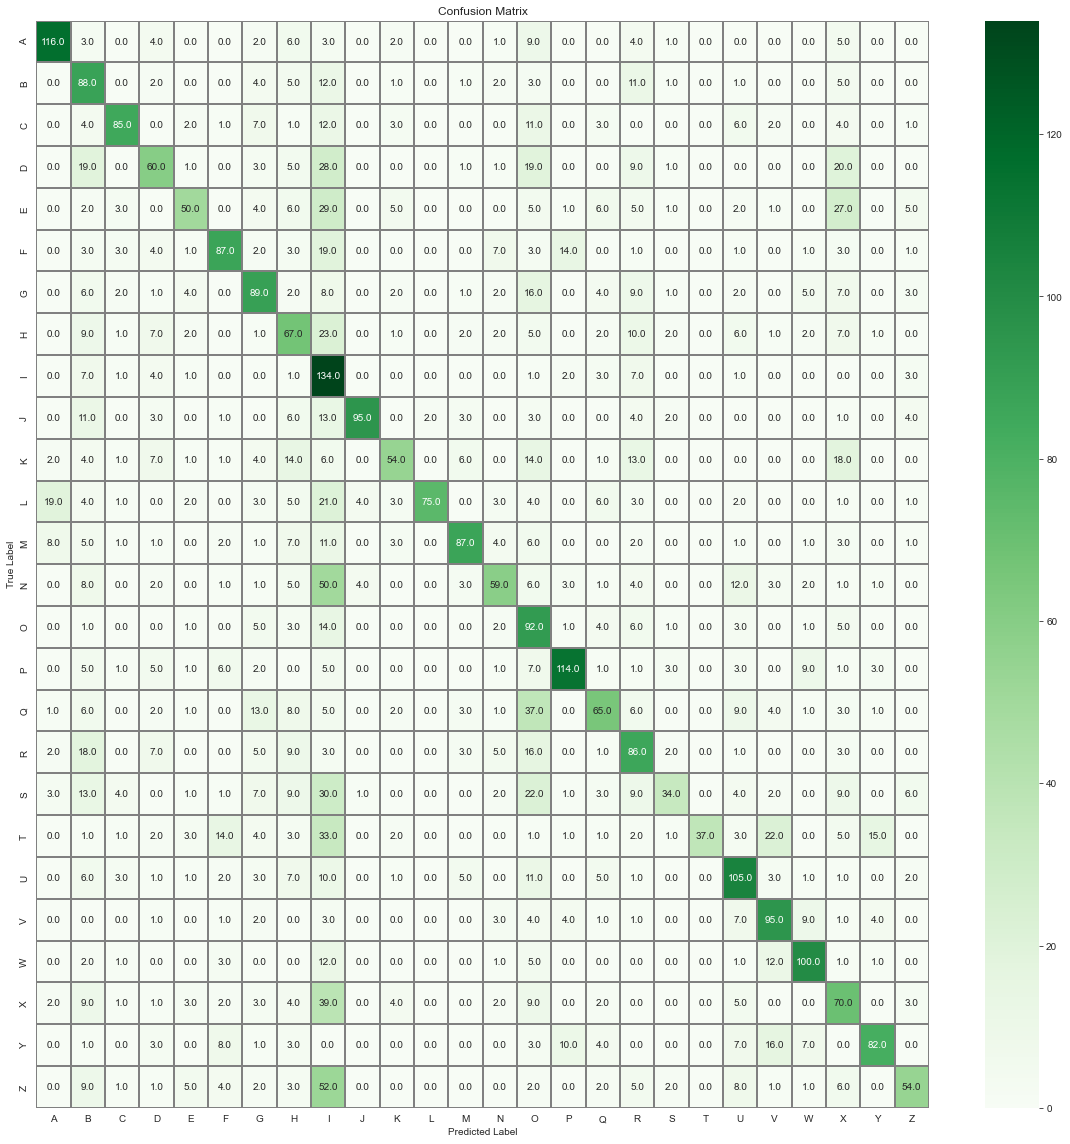

In [23]:
# Confusiın Matrix
confusion_mtx = confusion_matrix(predictions["Real_Val"], predictions["Prediction"]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax,xticklabels=np.unique(predictions["Prediction"].values),yticklabels=np.unique(predictions["Real_Val"]))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()